In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path
import mplhep

sys.path.append("../../../analysisTools/")
import plotTools as ptools

In [2]:
def add_signal_info_to_df(df):
    m1_list = []
    delta_list = []
    ctau_list = []
    
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1_list.append(sig_dict['m1'])
        delta_list.append(sig_dict['delta'])
        ctau_list.append(sig_dict['ctau'])
    
    df['m1'] = m1_list
    df['delta'] = delta_list
    df['ctau'] = ctau_list
    
    df = df.sort_values(by=['m1']) # sort by m1

    return df

In [3]:
def save_df_to_csv(df, outdir, outname, isSignal = False):
    Path(outdir).mkdir(parents=True, exist_ok=True)

    if isSignal:
        df = add_signal_info_to_df(df)
    
    df.to_csv(f'{outdir}/{outname}.csv')

    print(f'Saved: {outdir}/{outname}.csv')

# Plot 1D: True Best vertex vs. False Best vertex in gen-ee reconstructed events

In [4]:
prefix = './coffea/skimmed/'

In [5]:
# Signal
sig_histo_best = util.load(f'{prefix}/SR_ISRcuts_BestVertex.coffea')[0]
sig_histo_true = util.load(f'{prefix}/SR_ISRcuts_TrueVertex.coffea')[0]
sig_histo_false = util.load(f'{prefix}/SR_ISRcuts_FalseAndMinChi2Vertex_genEEreconstructed.coffea')[0]

In [6]:
prefix = './coffea/skimmed/'
suffix = '_SR_ISRcuts'

In [7]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]

In [8]:
# example dictionaries for plotting

plot_dict = {
    'variable': 'sel_vtx_dR',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogx': False,
    'doLogy': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

### sel_vtx_vxy

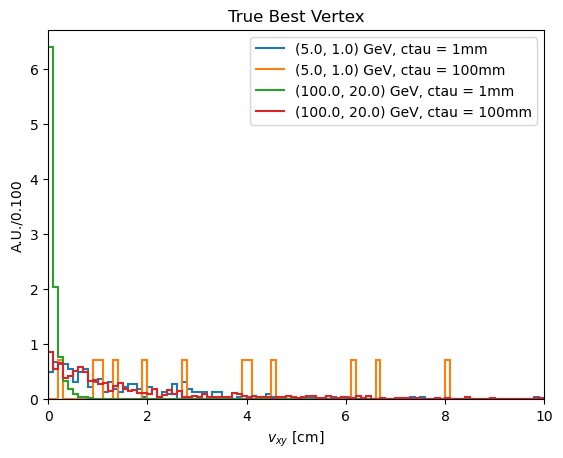

In [9]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 20j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

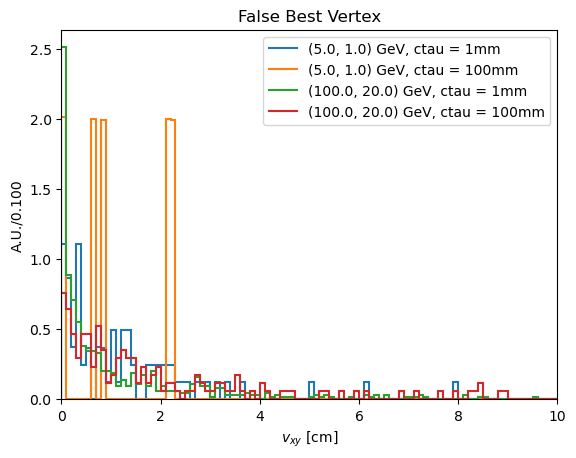

In [10]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 20j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

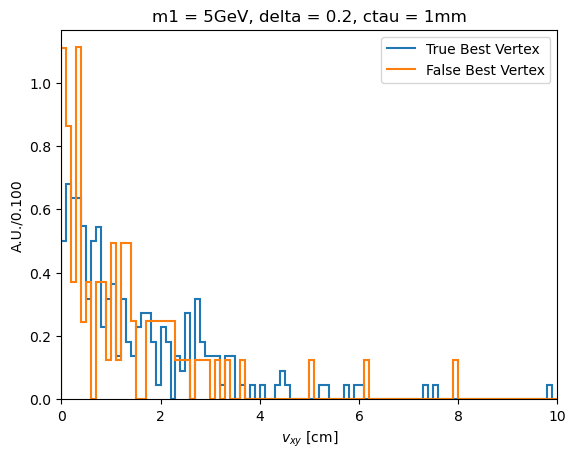

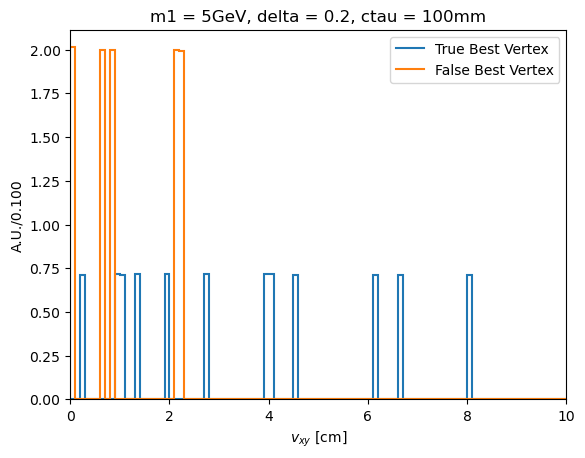

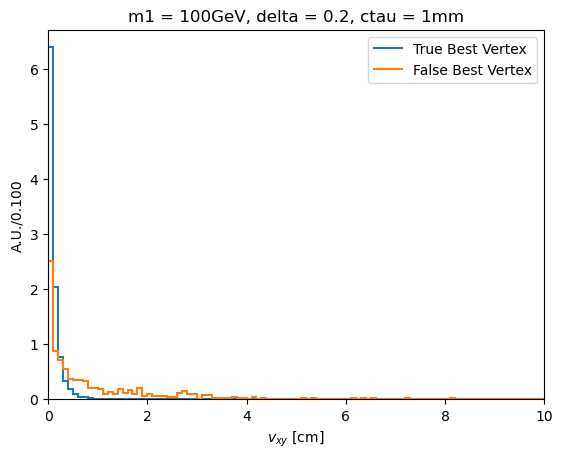

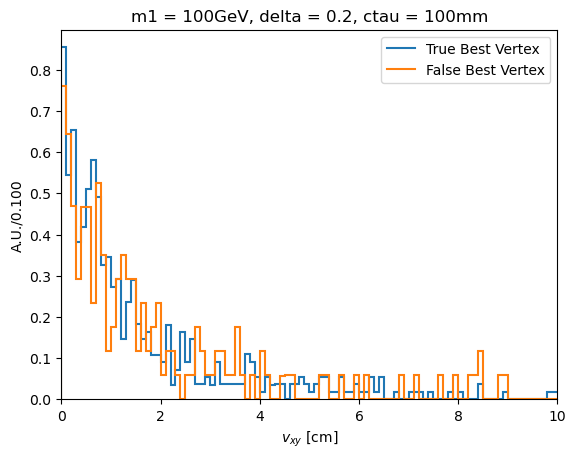

In [11]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 20j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_minDxy

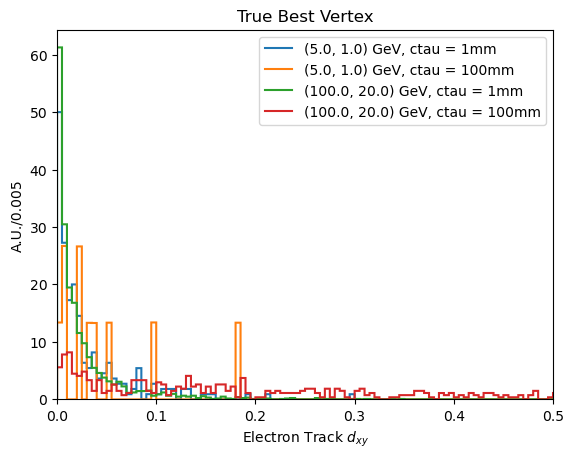

In [12]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

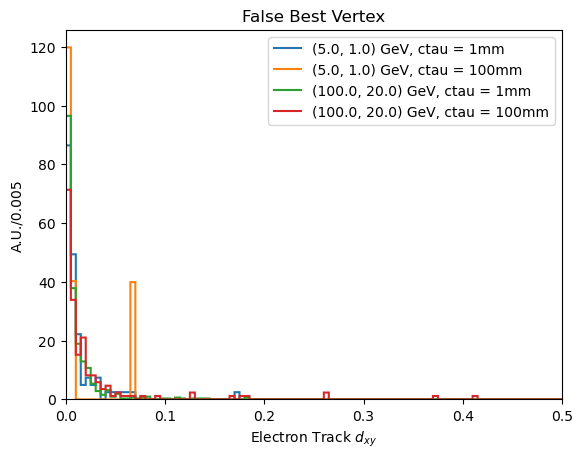

In [13]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

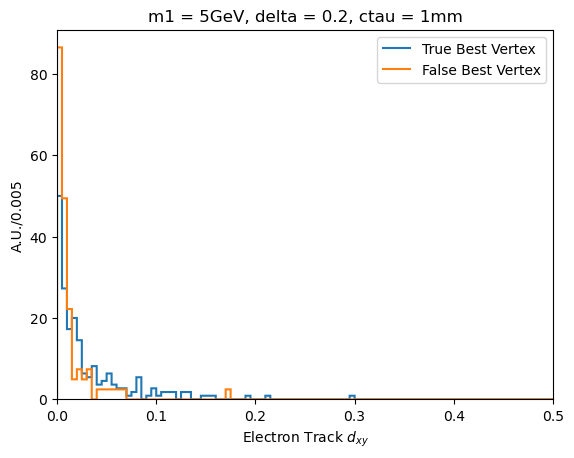

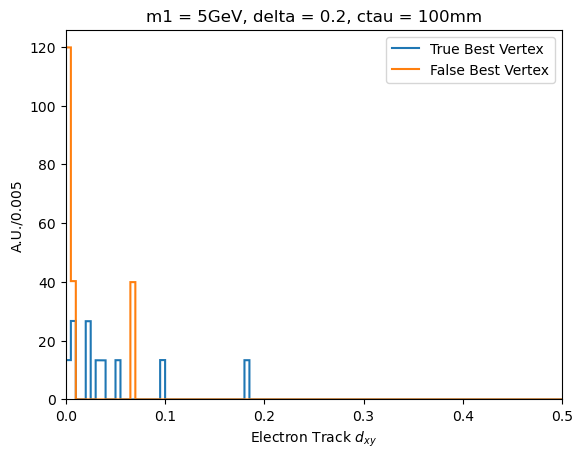

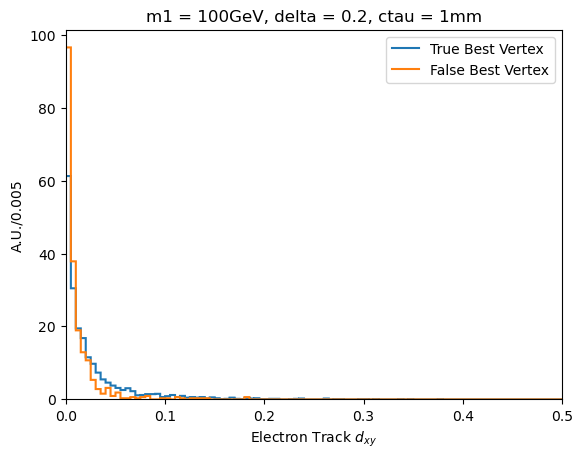

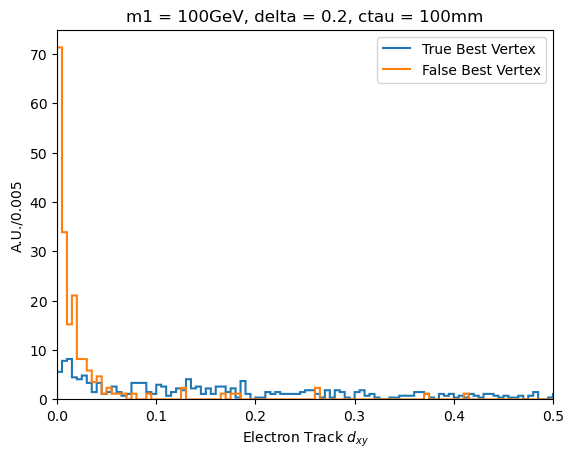

In [14]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_minDz

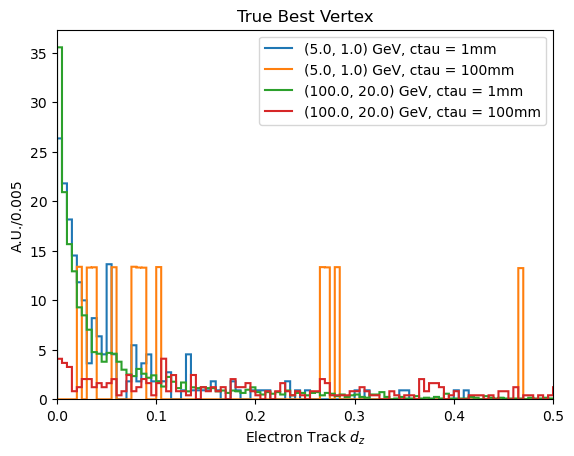

In [15]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

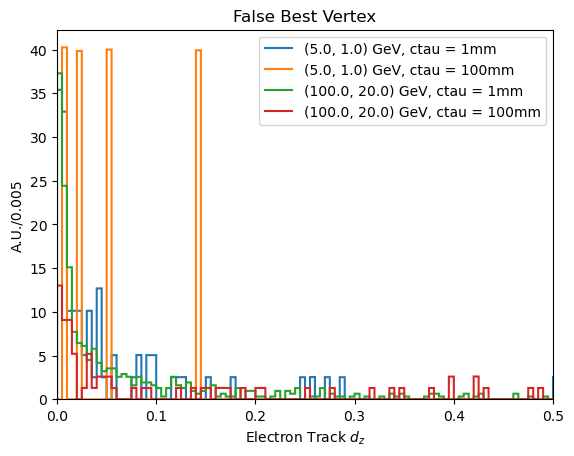

In [16]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

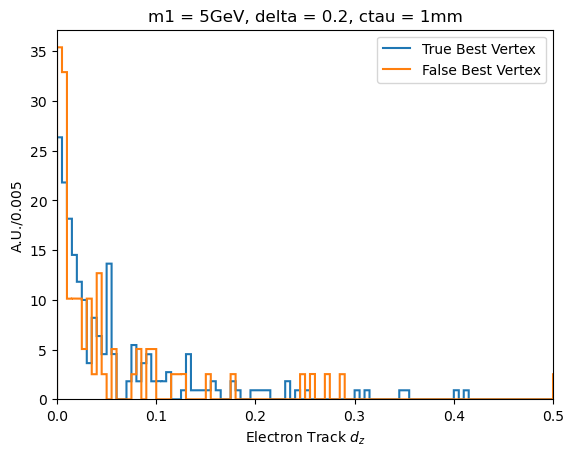

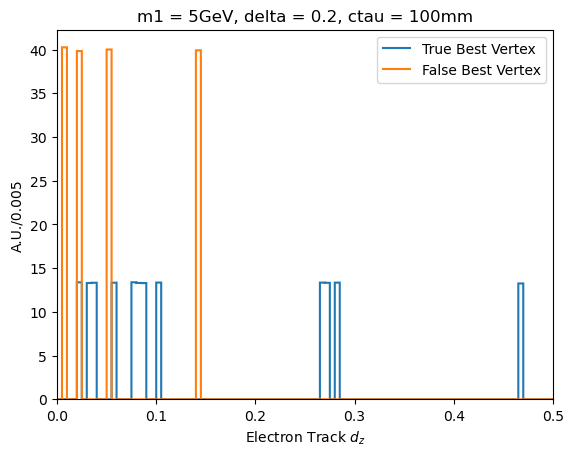

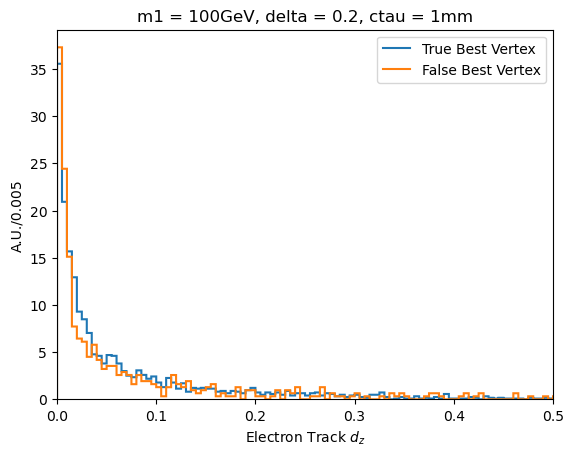

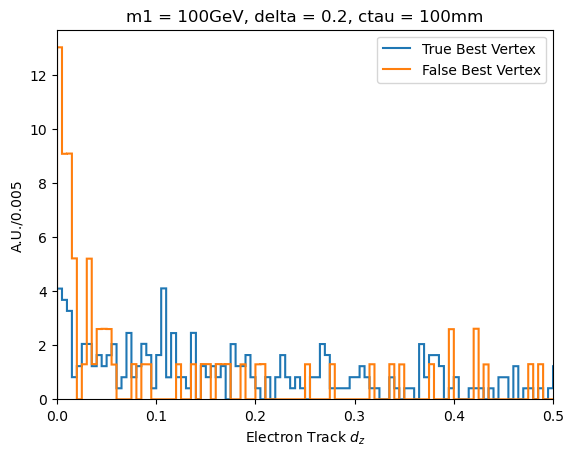

In [17]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_deltaDxy

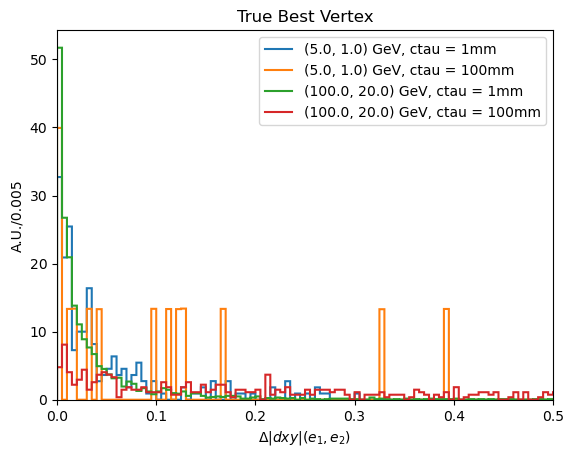

In [18]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dxy|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

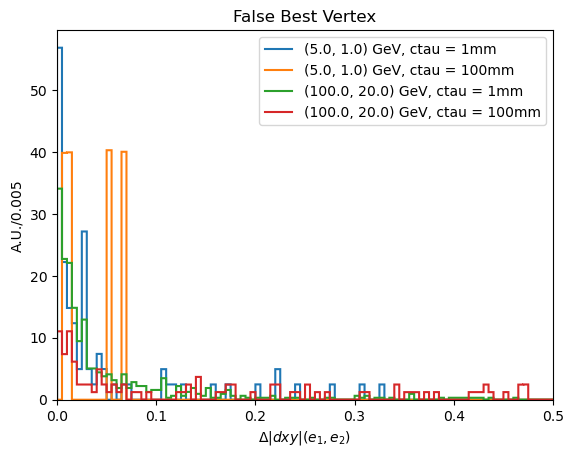

In [19]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dxy|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

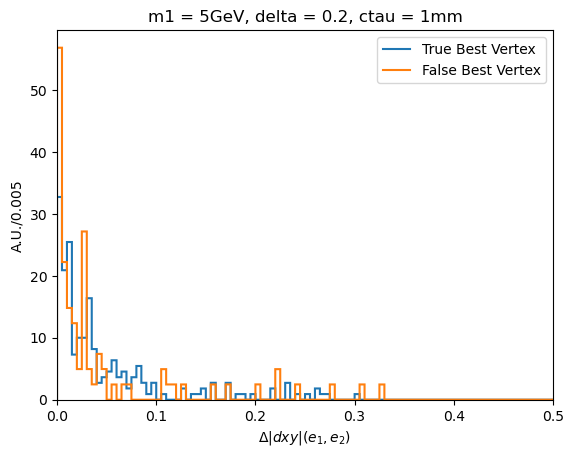

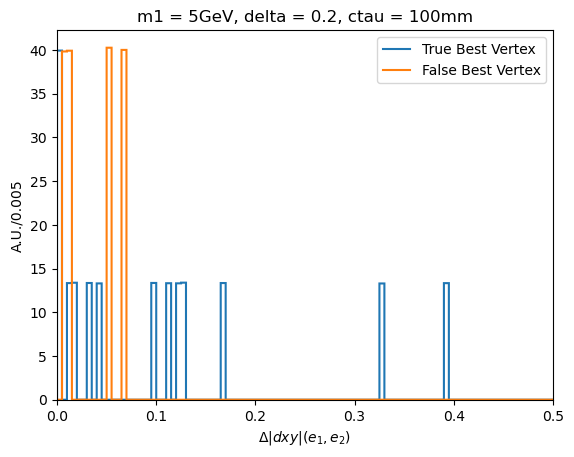

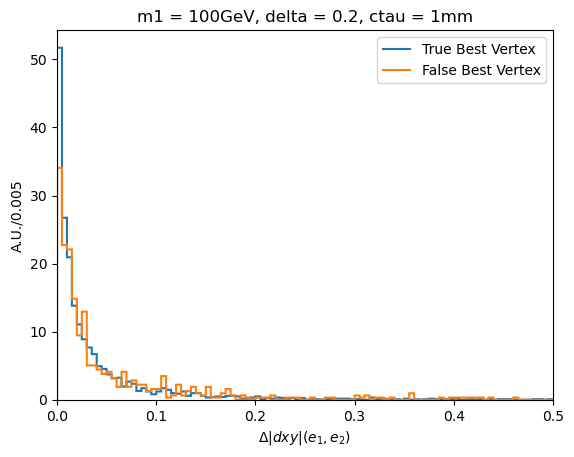

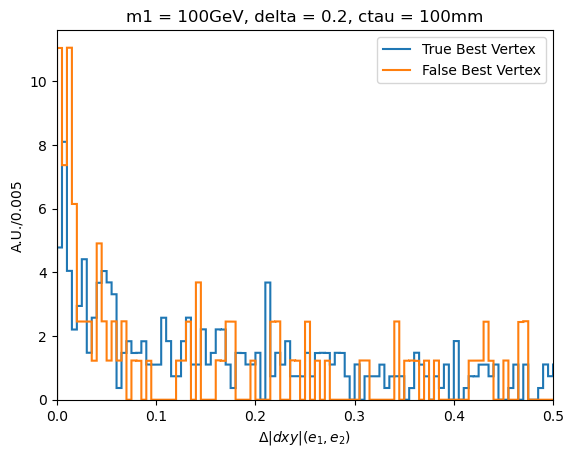

In [20]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dxy|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_deltaDz

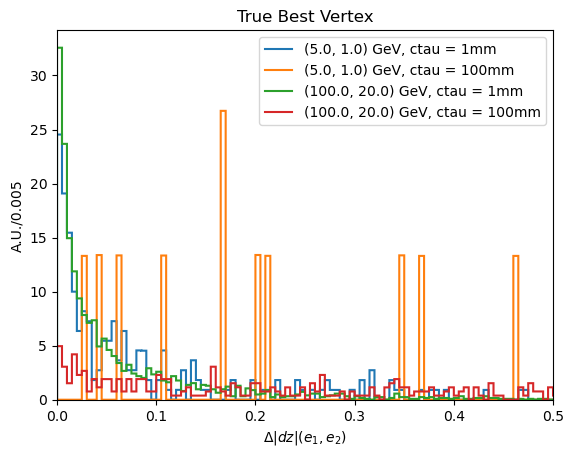

In [21]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dz|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

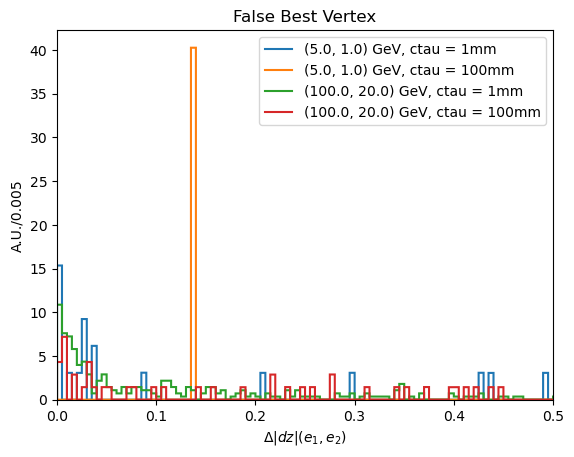

In [22]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dz|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

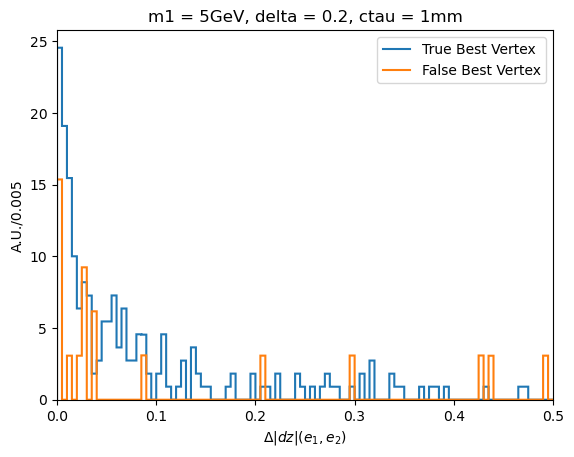

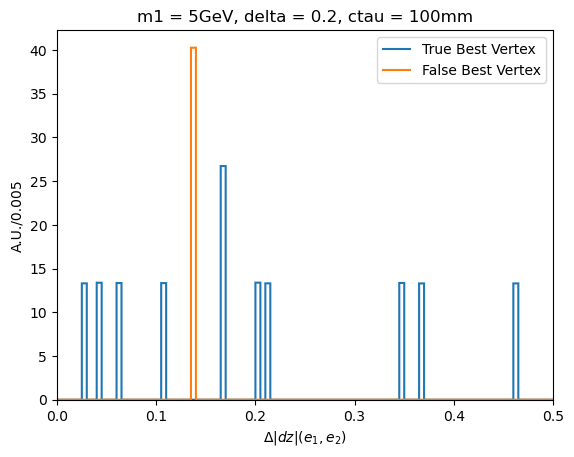

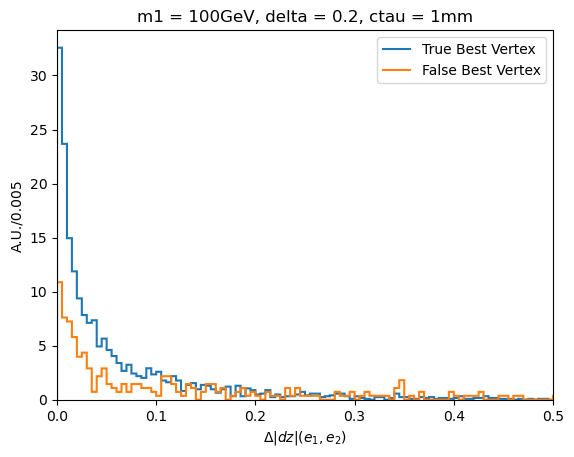

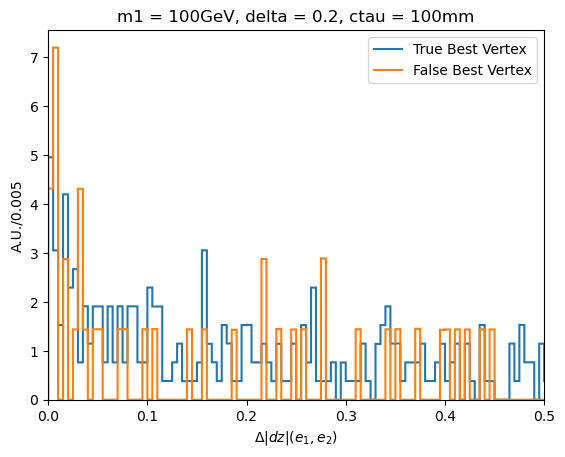

In [23]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dz|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_vxySignif

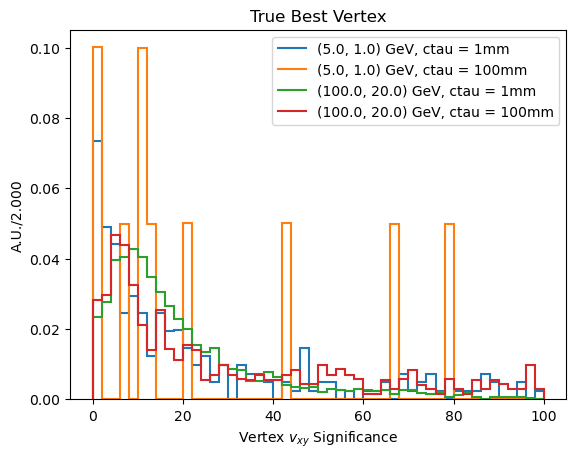

In [24]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

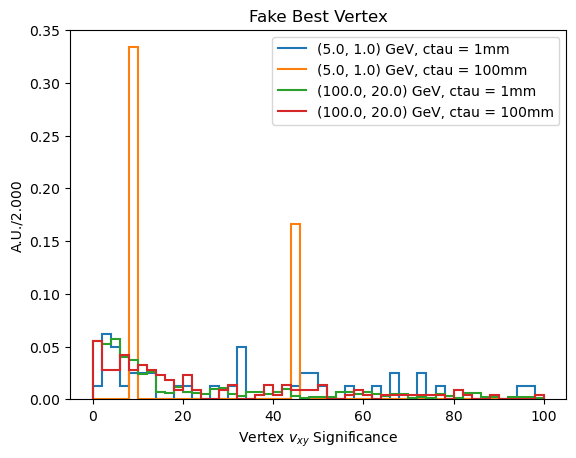

In [25]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('Fake Best Vertex')
plt.legend()
plt.show()

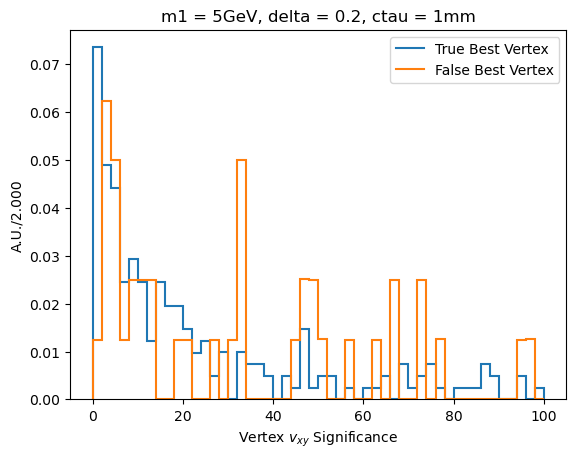

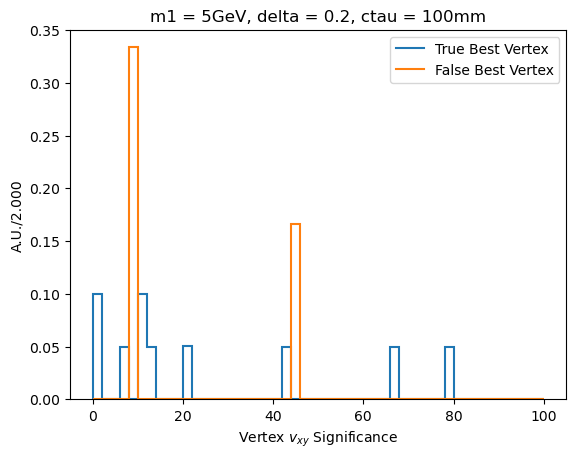

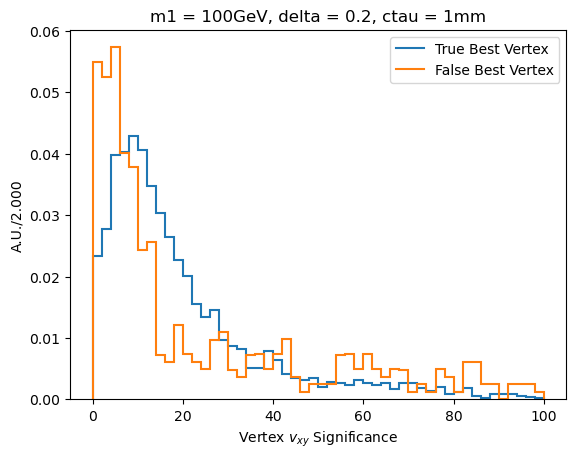

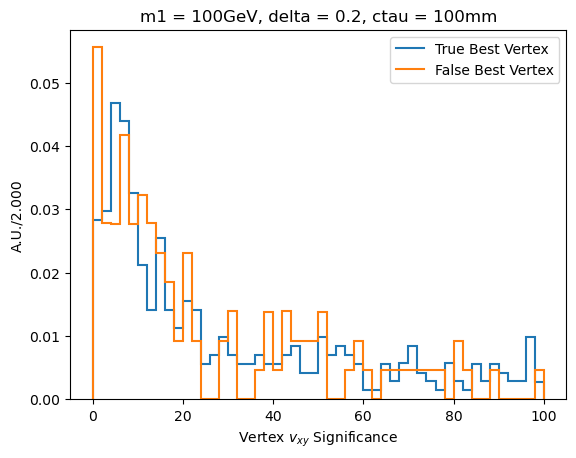

In [26]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_type

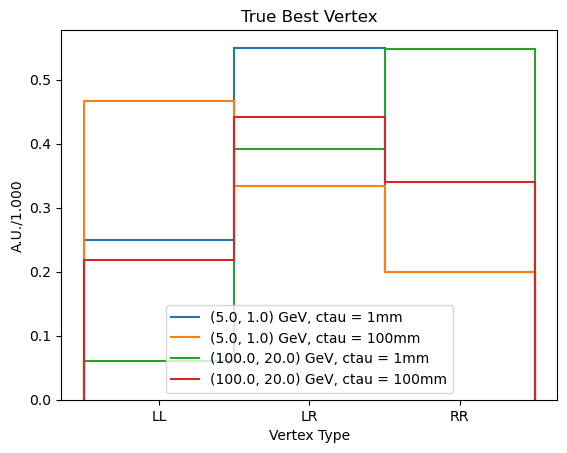

In [27]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

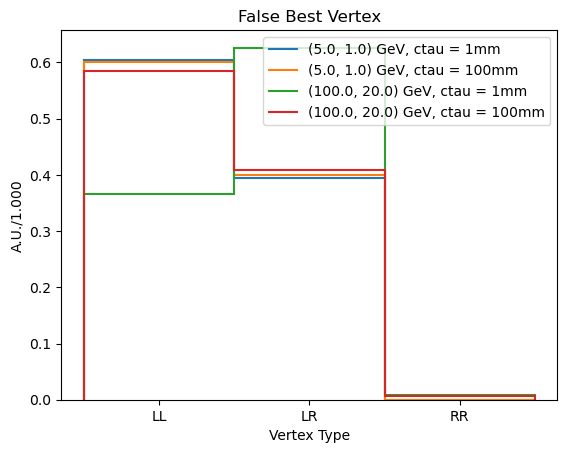

In [28]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

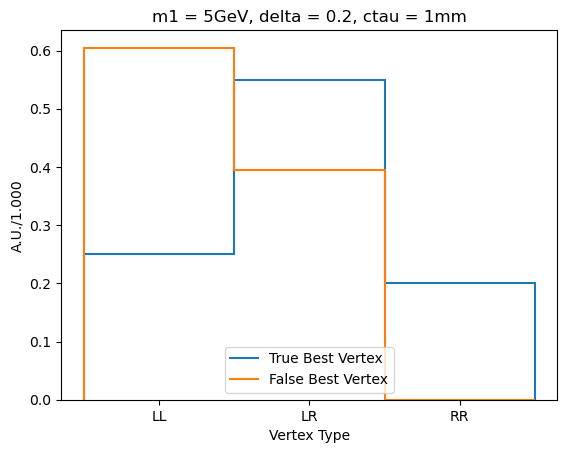

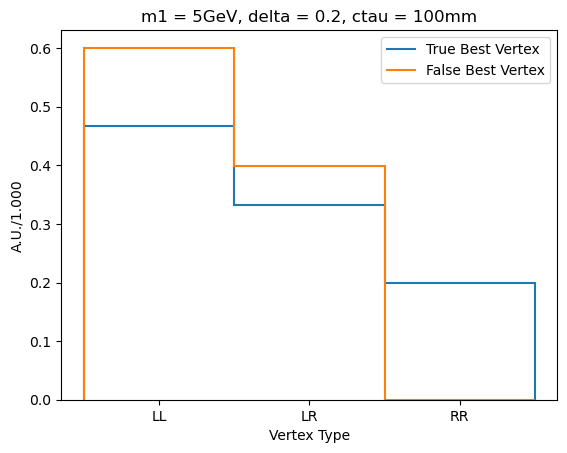

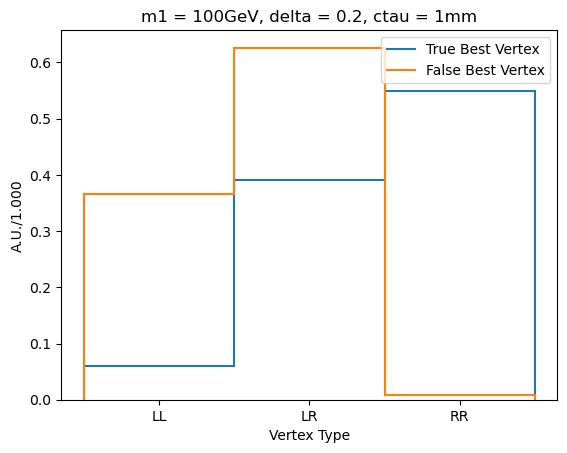

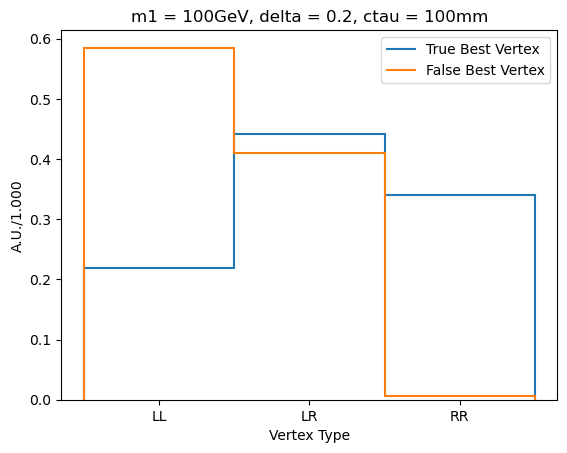

In [29]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_chi2

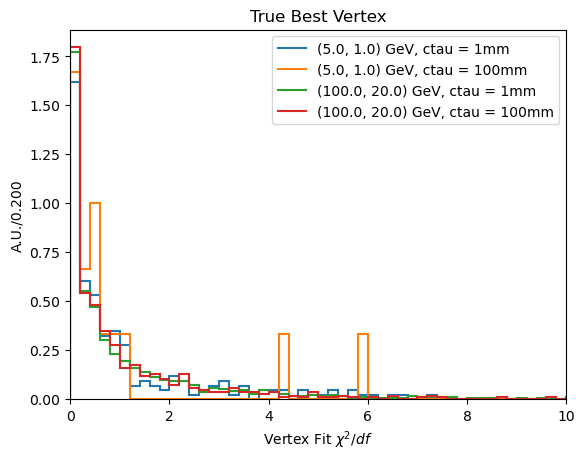

In [30]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

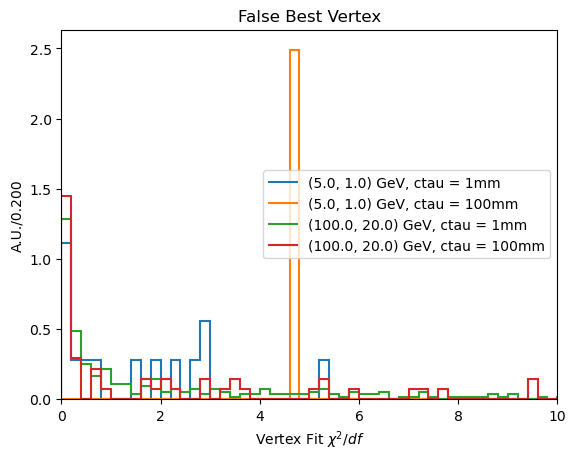

In [31]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

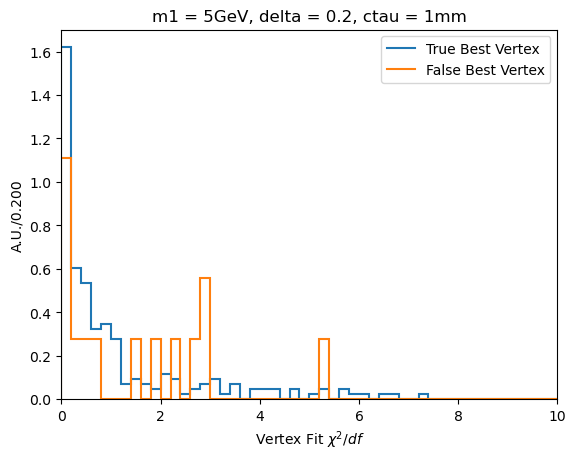

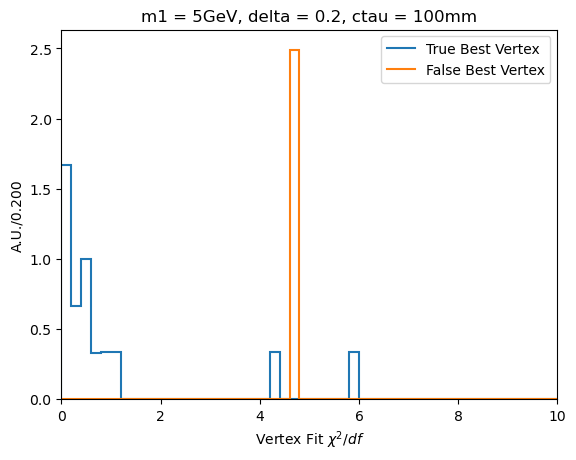

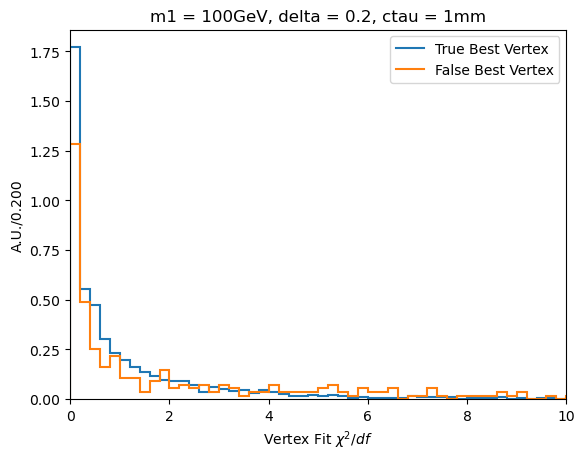

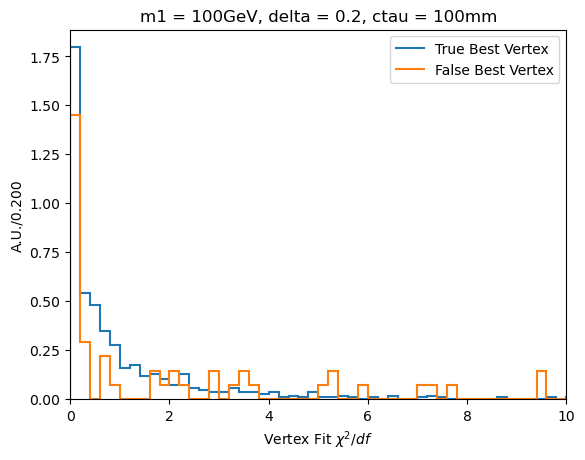

In [32]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_dR

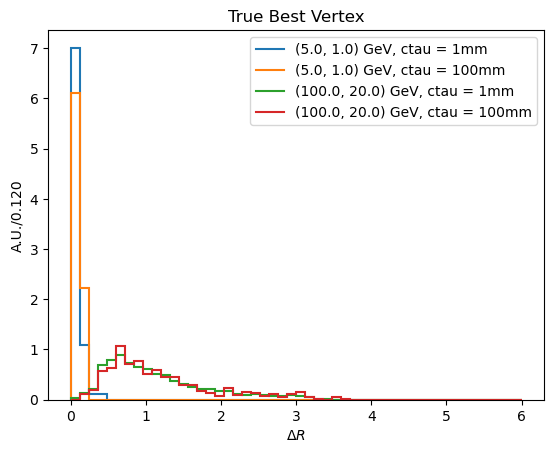

In [33]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

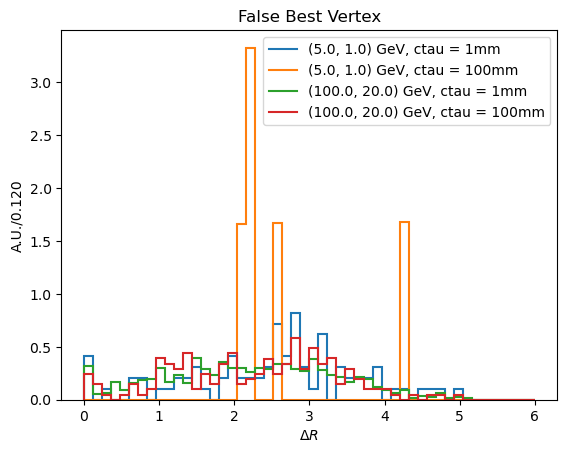

In [34]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

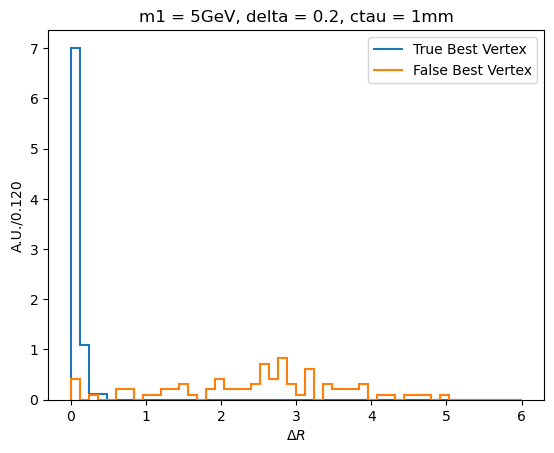

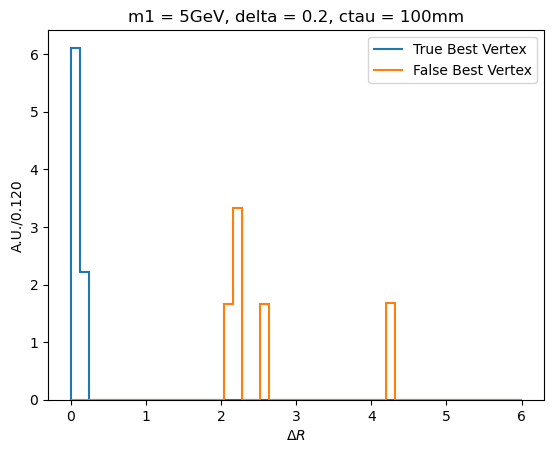

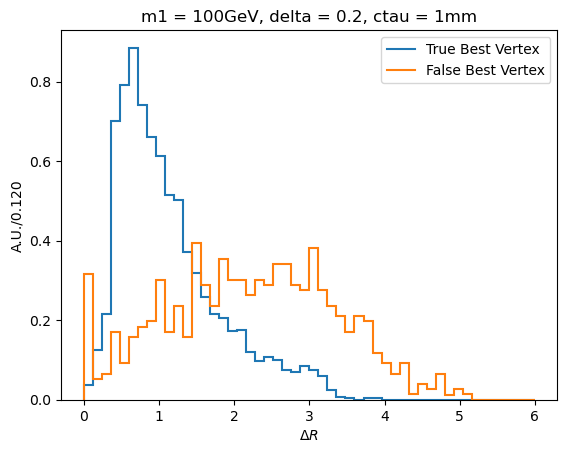

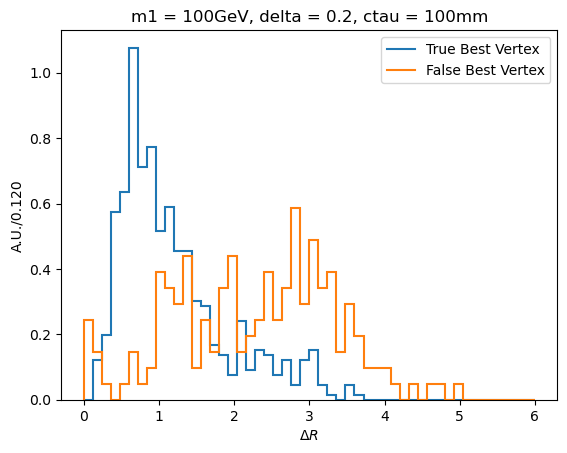

In [35]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_dEta

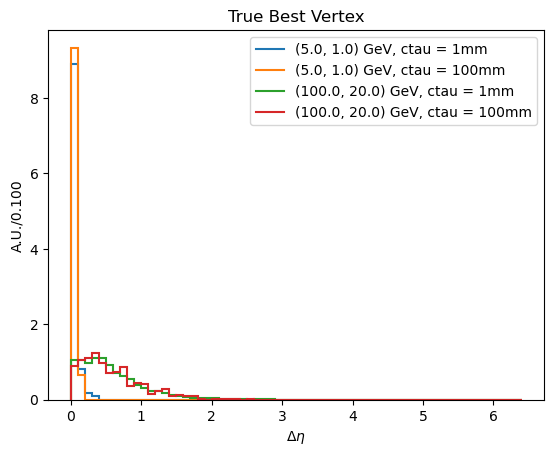

In [36]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

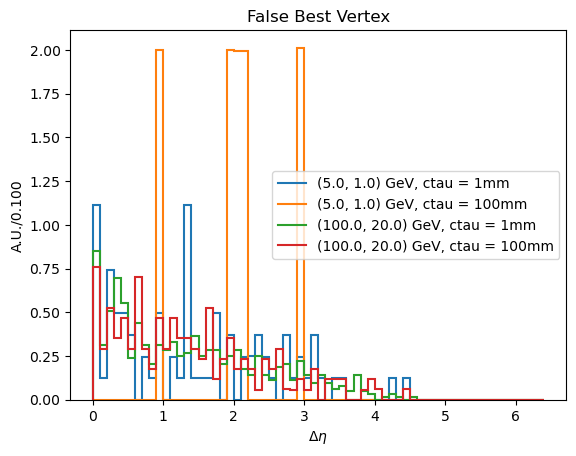

In [37]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

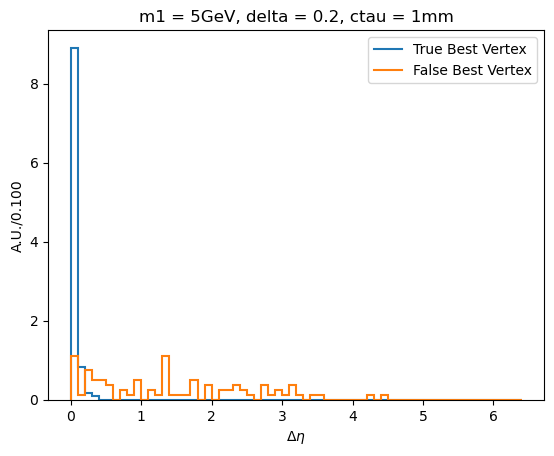

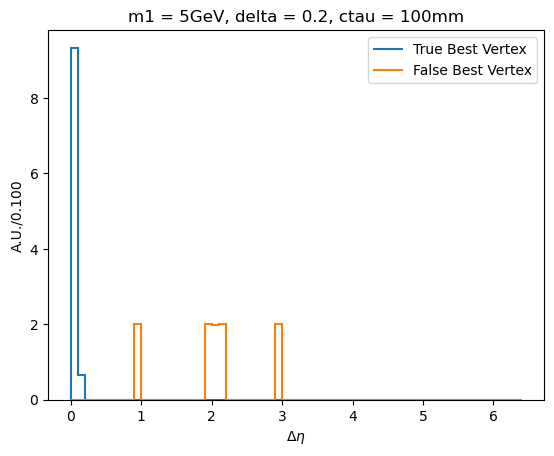

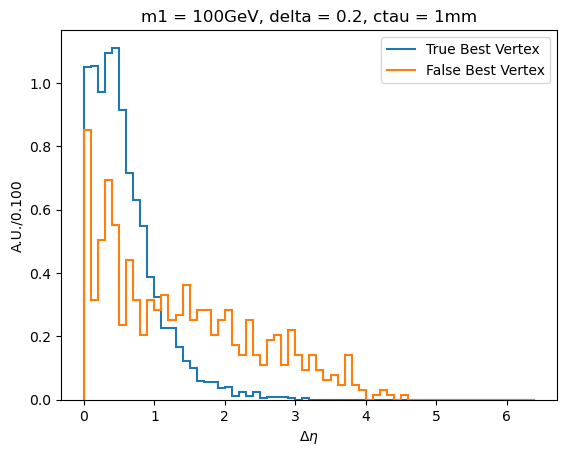

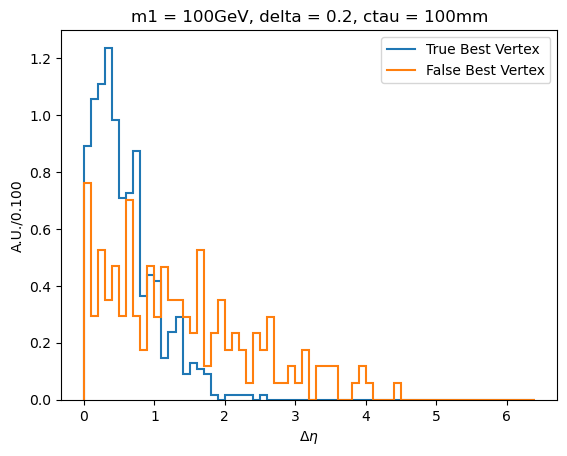

In [38]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_dPhi

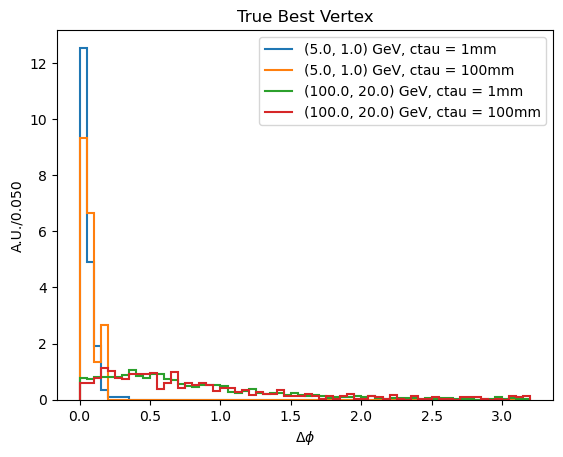

In [39]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

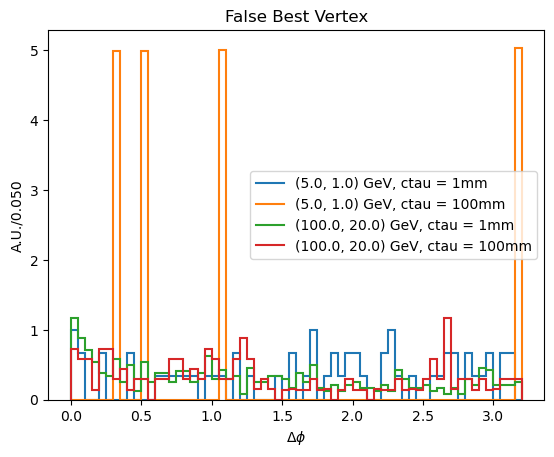

In [40]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

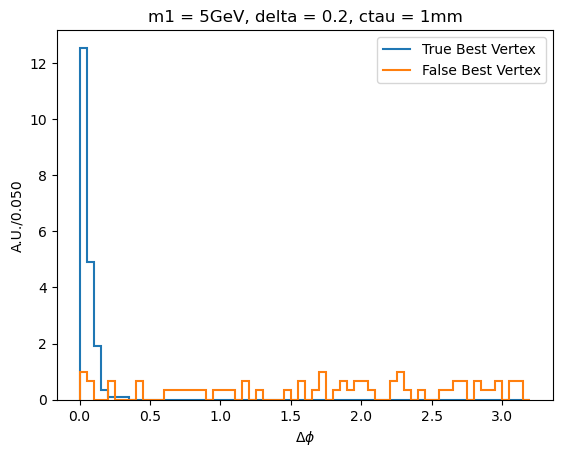

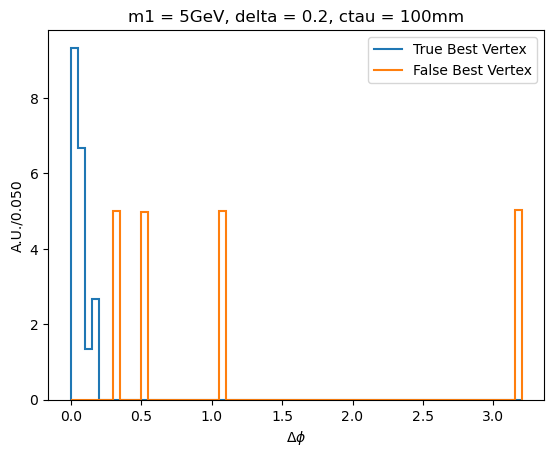

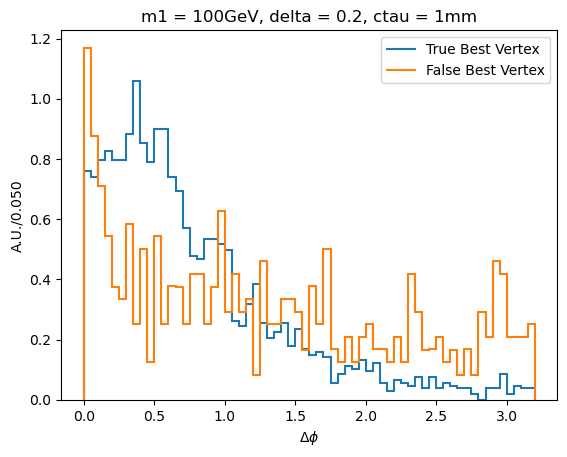

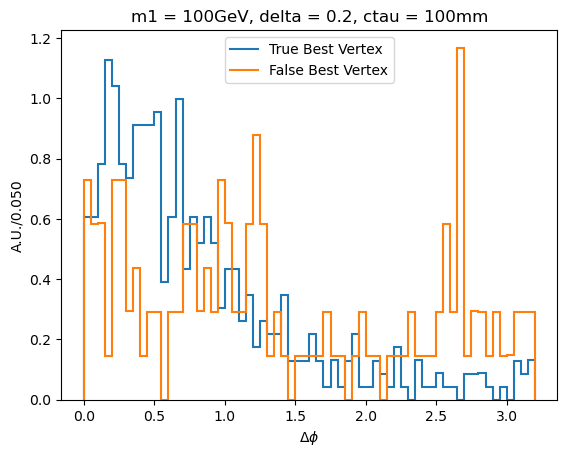

In [41]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_sign_eta

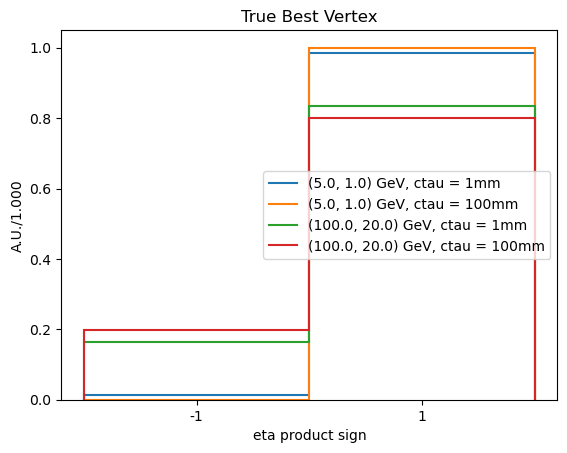

In [42]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

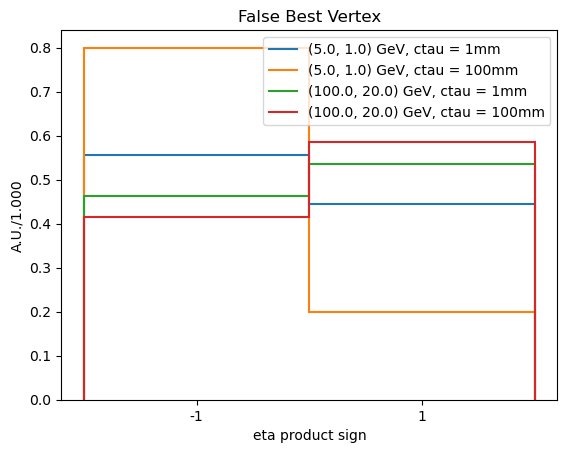

In [43]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

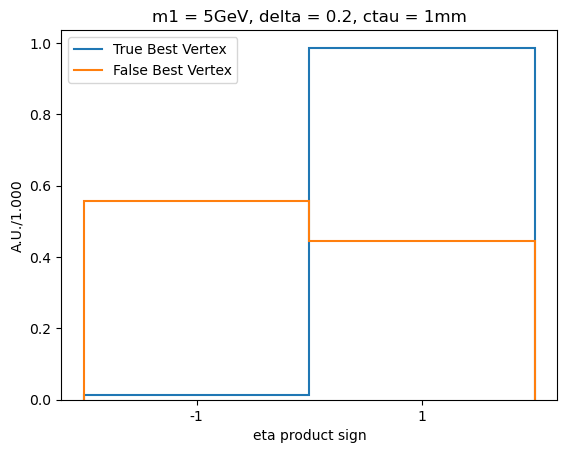

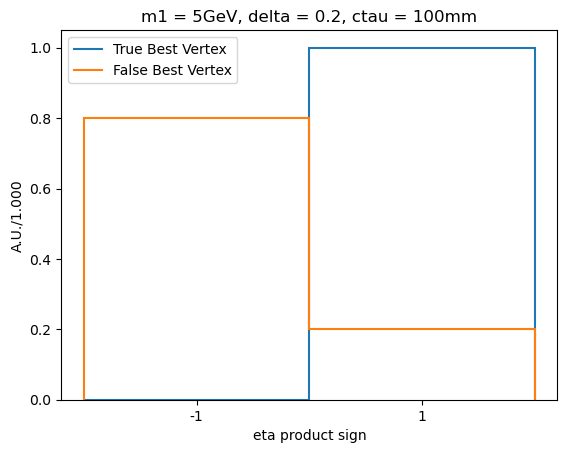

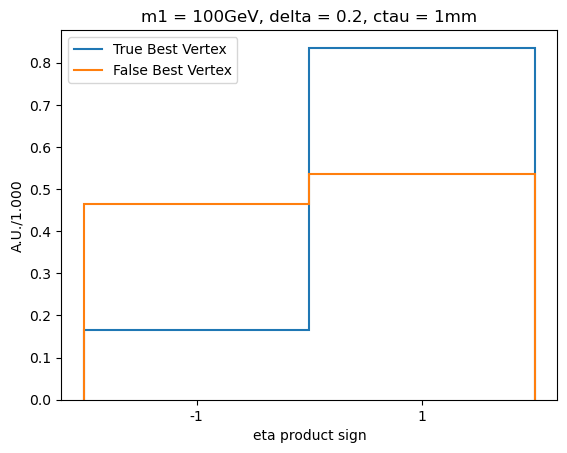

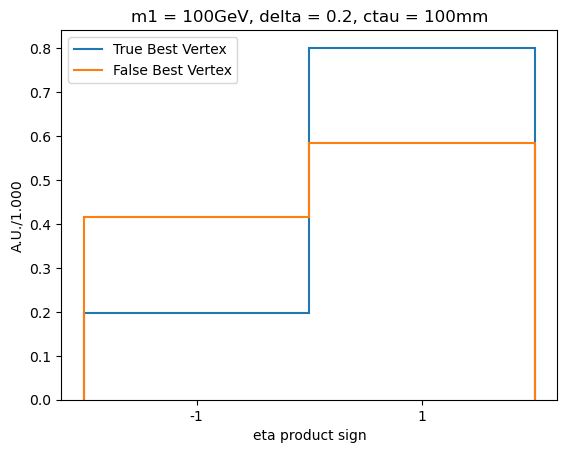

In [44]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_METdPhi

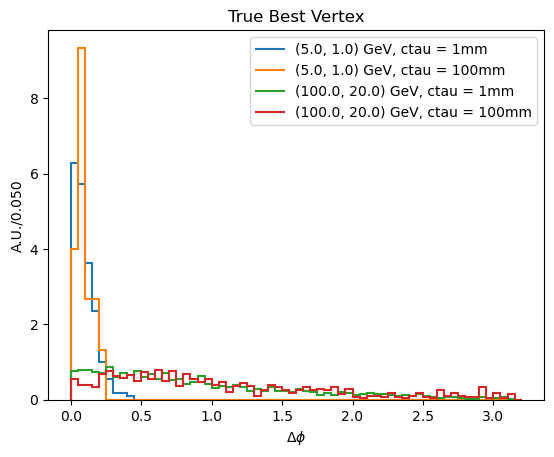

In [45]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_METdPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

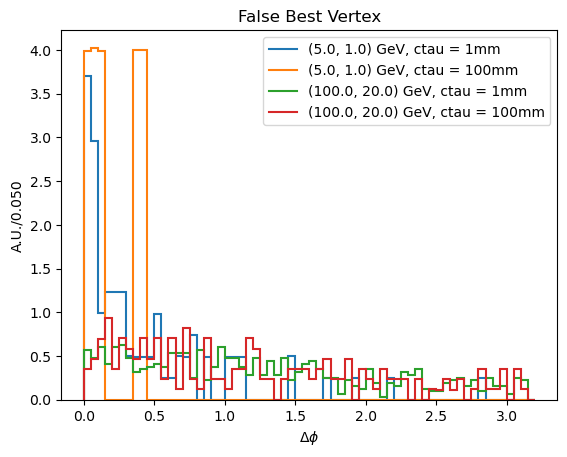

In [46]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_METdPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

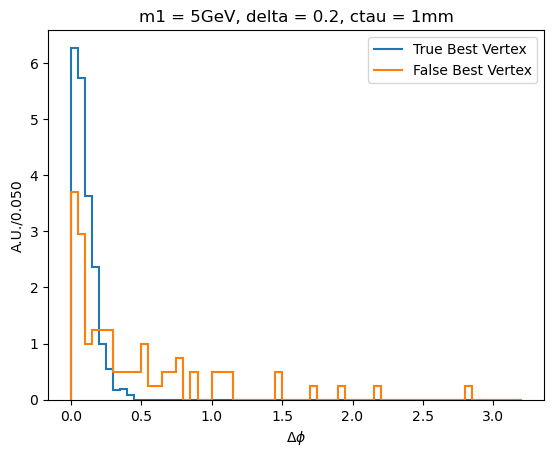

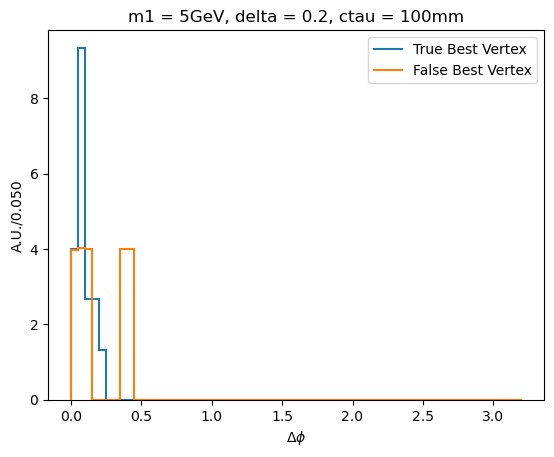

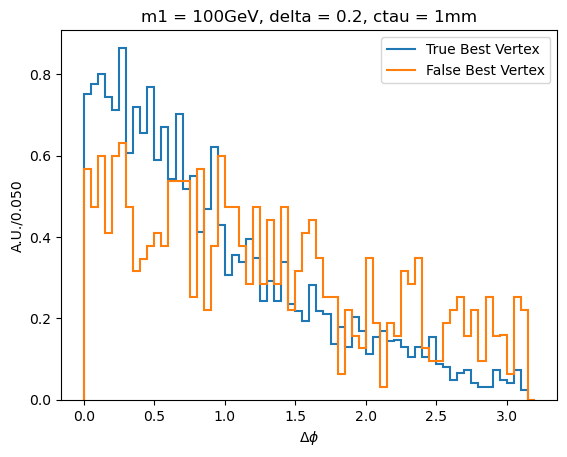

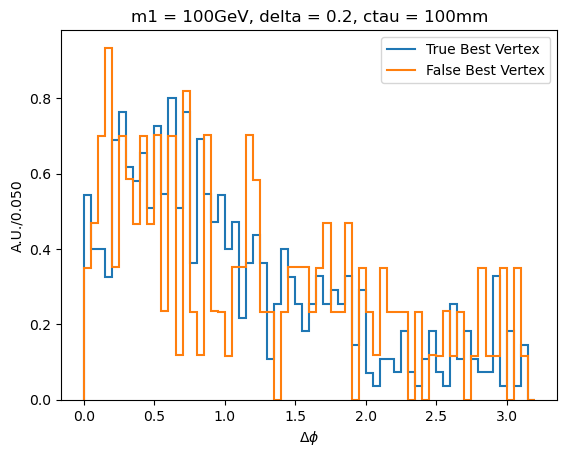

In [47]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_METdPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_pt

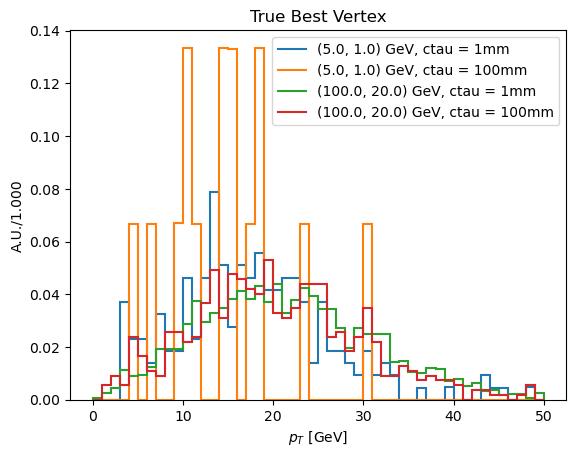

In [48]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

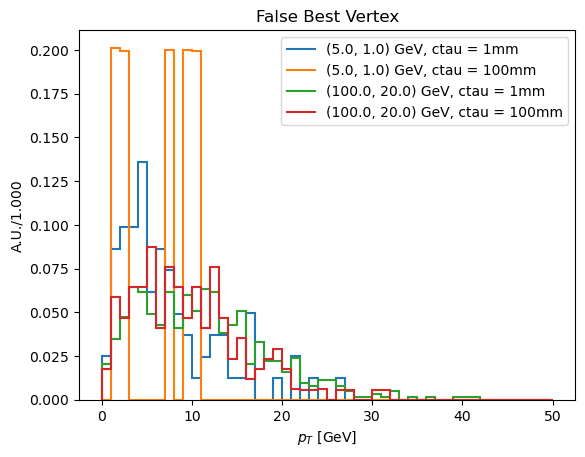

In [49]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

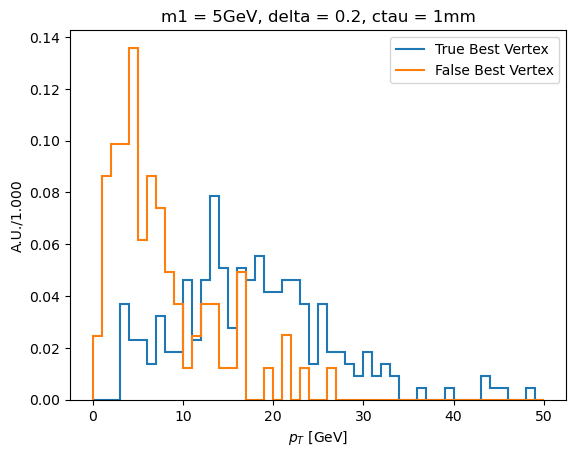

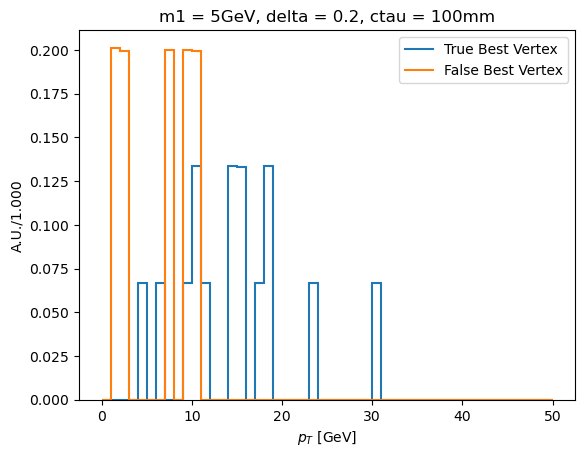

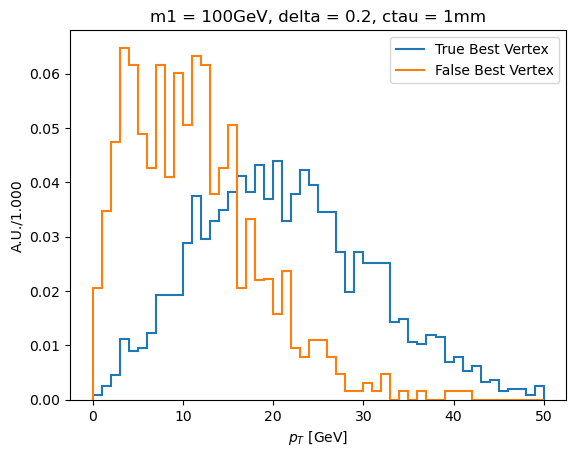

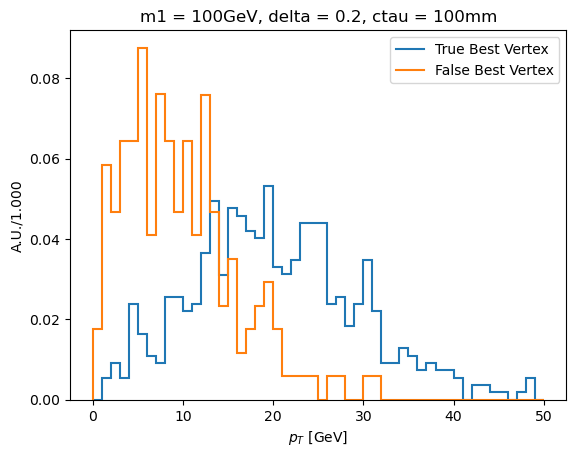

In [50]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_eta

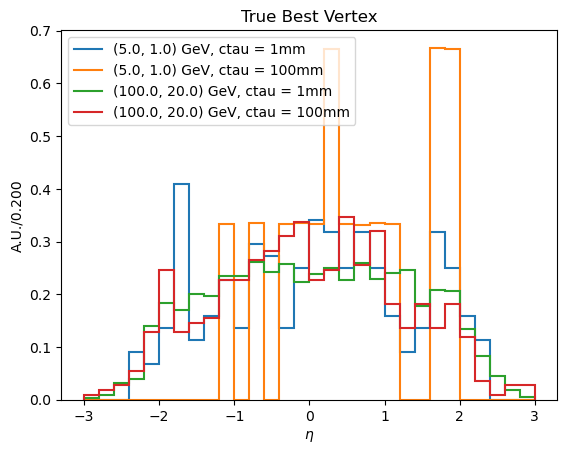

In [51]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

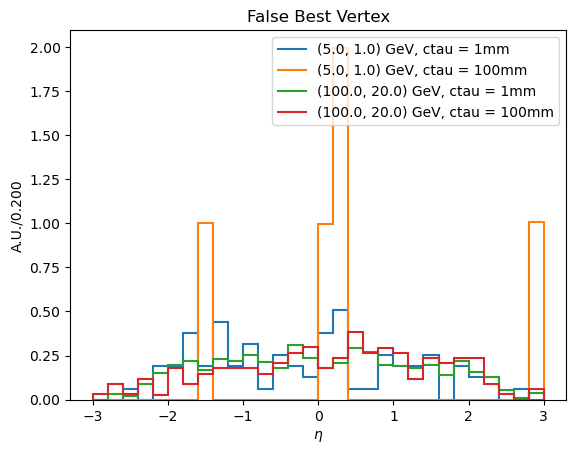

In [52]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

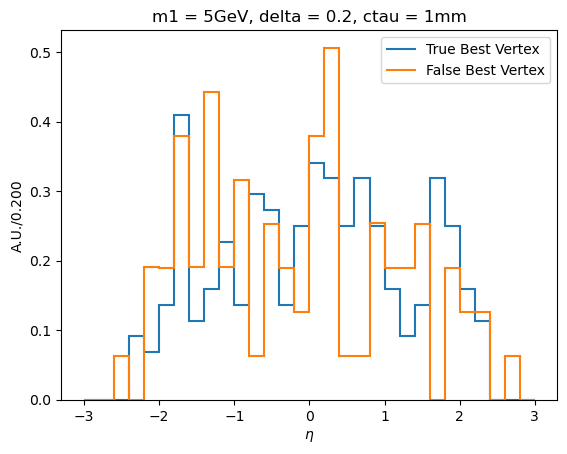

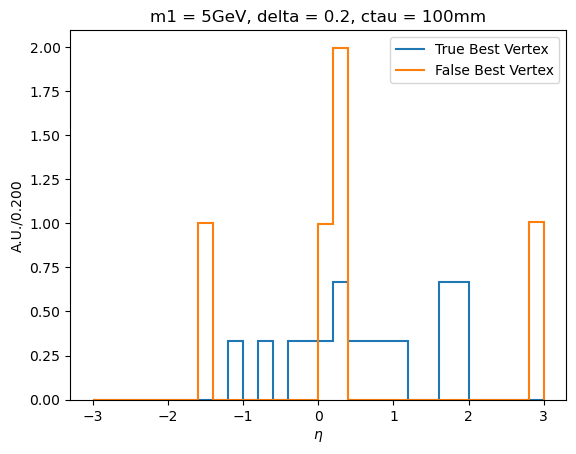

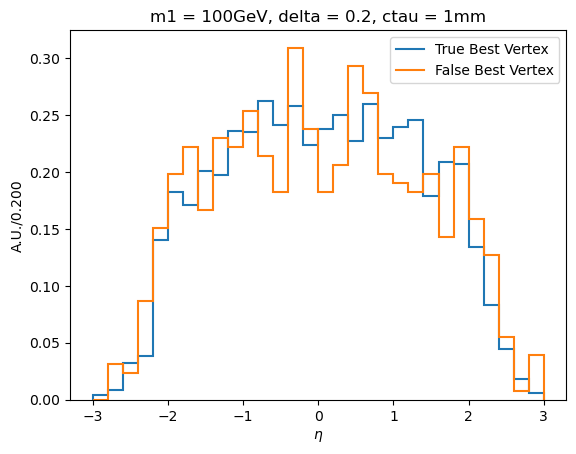

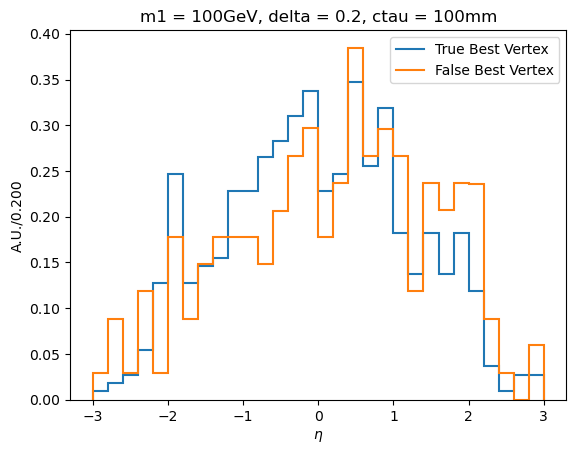

In [53]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_phi

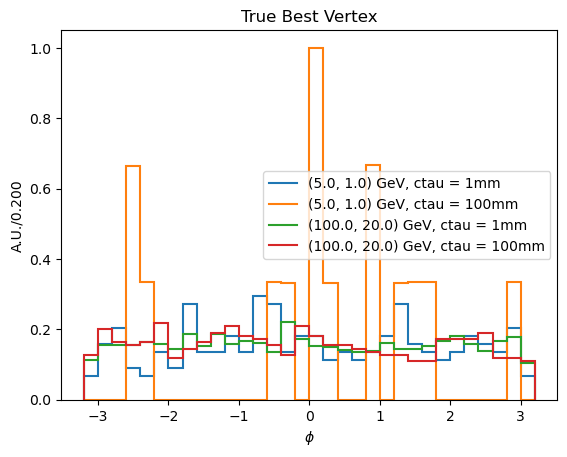

In [54]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_phi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

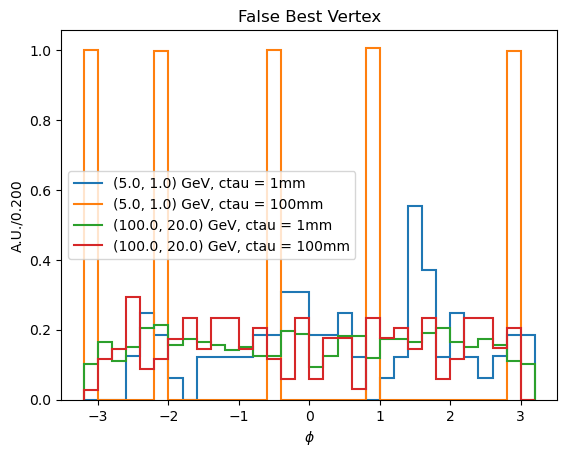

In [55]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_phi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

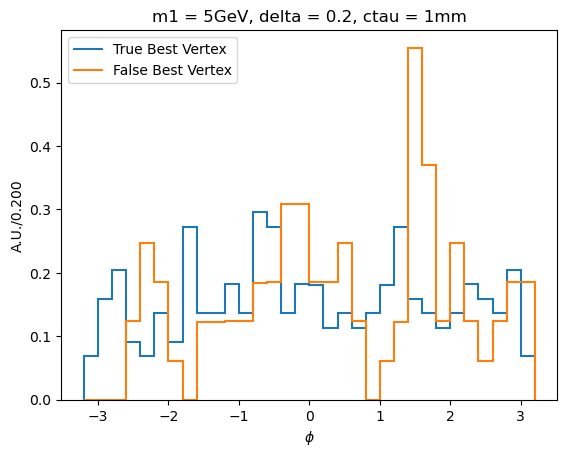

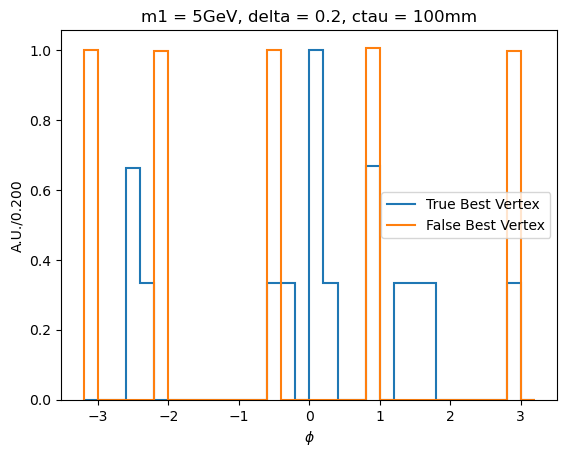

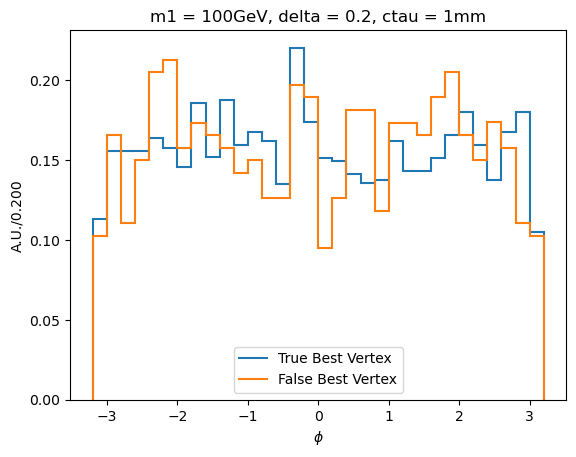

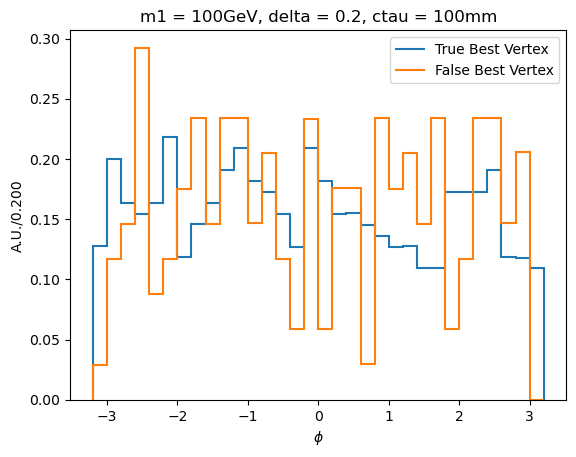

In [56]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_phi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### sel_vtx_mass

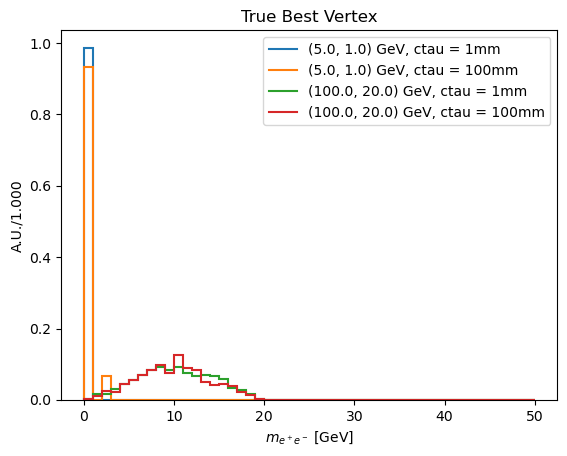

In [57]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

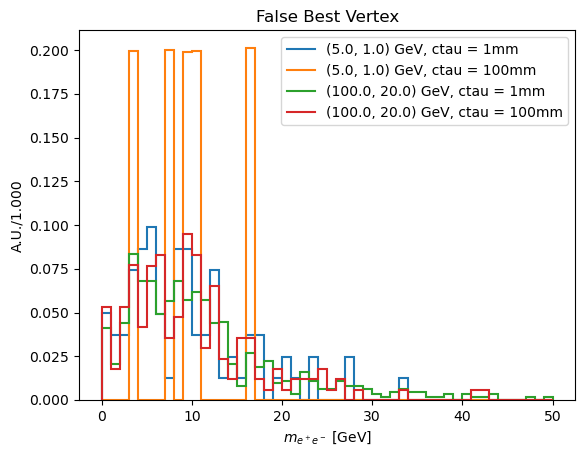

In [58]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

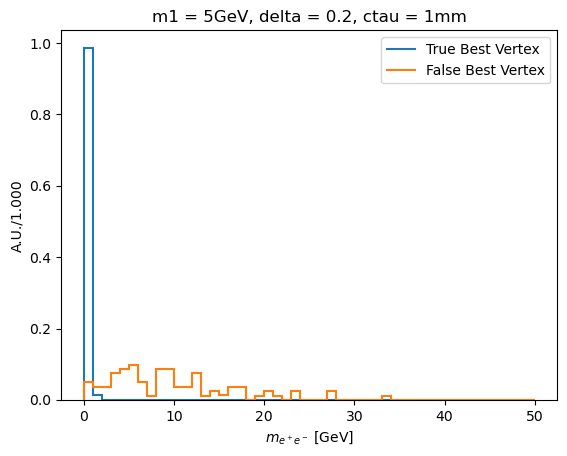

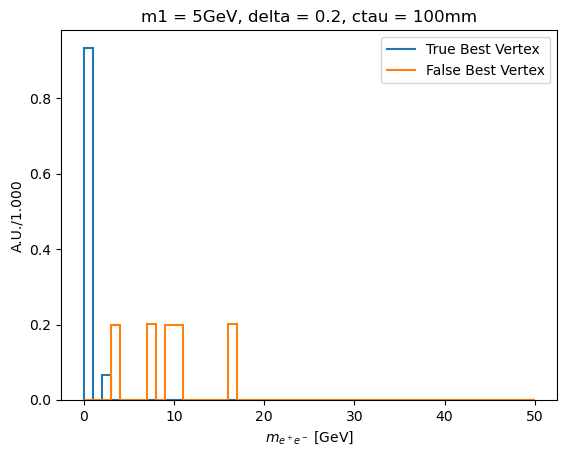

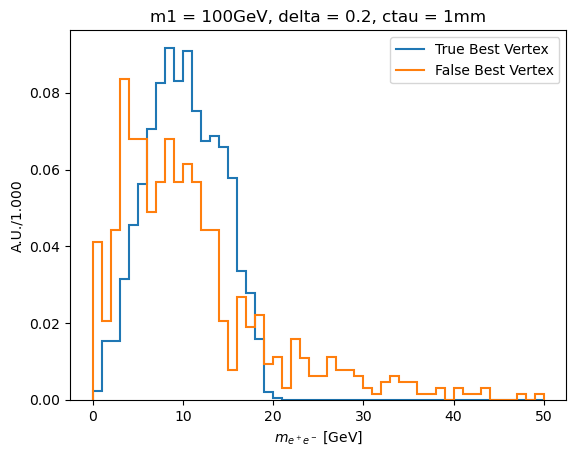

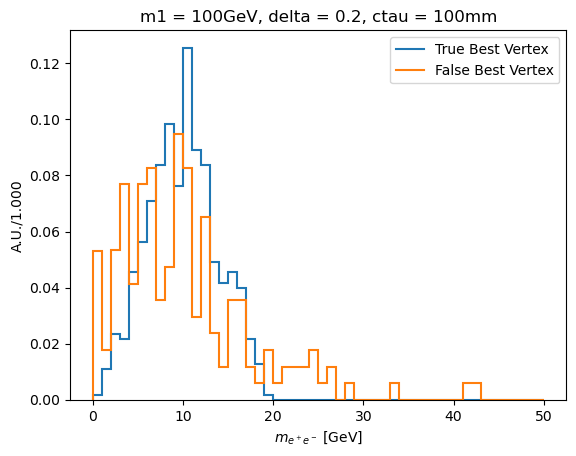

In [59]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### nLpt_Electron

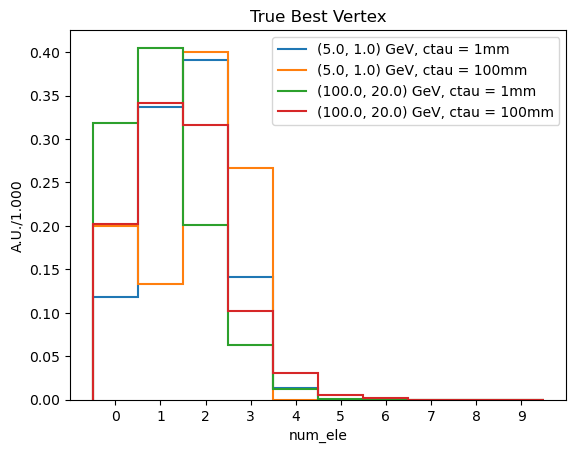

In [60]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nLpt_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

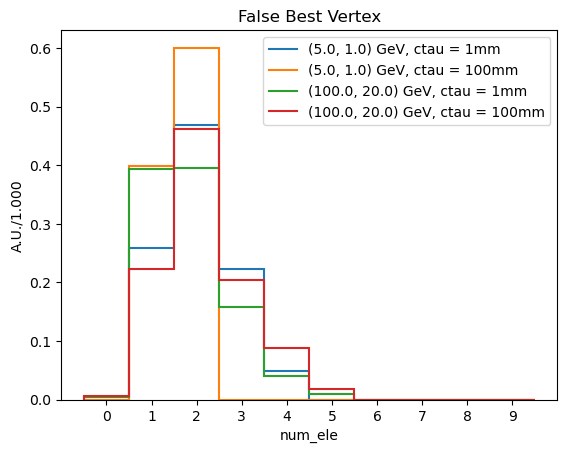

In [61]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nLpt_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

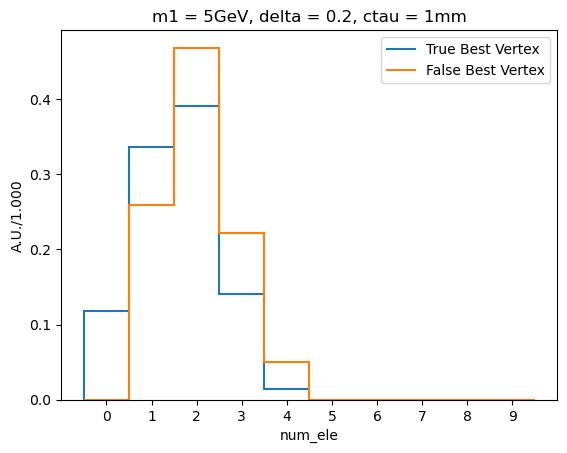

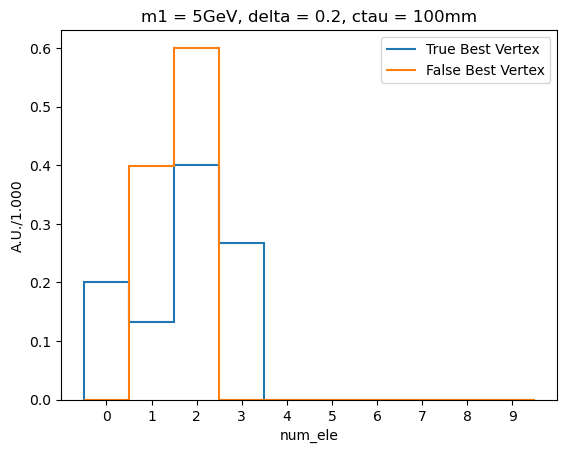

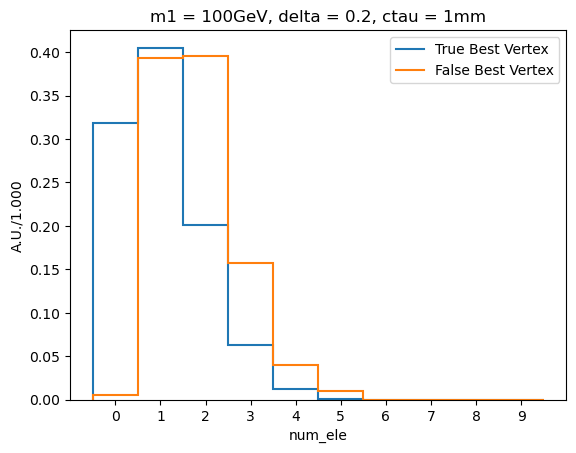

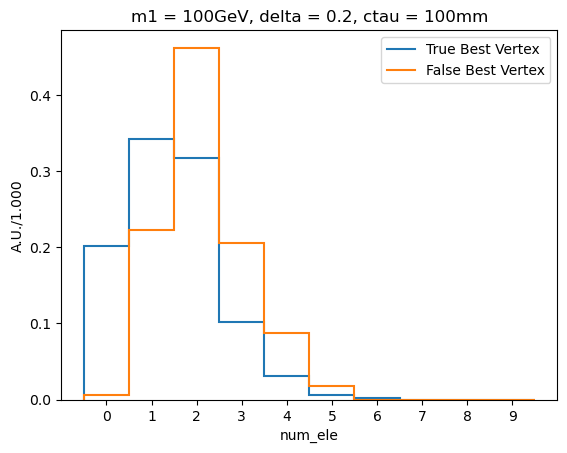

In [62]:
# Plot settings
plot_dict = {
    'variable': 'nLpt_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### nPF_Electron

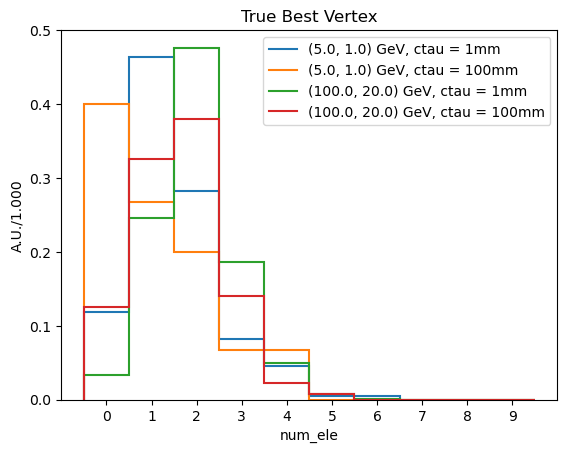

In [63]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nPF_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

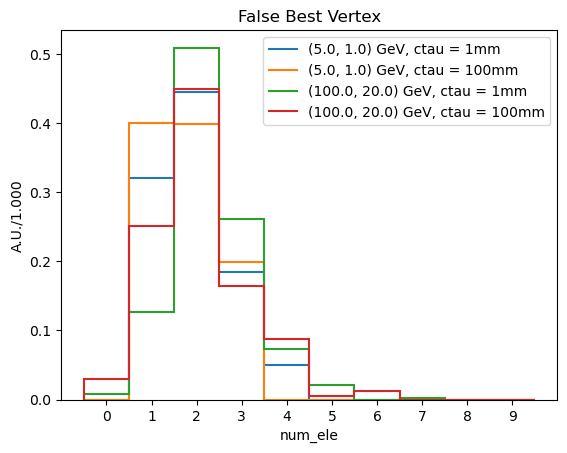

In [64]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nPF_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

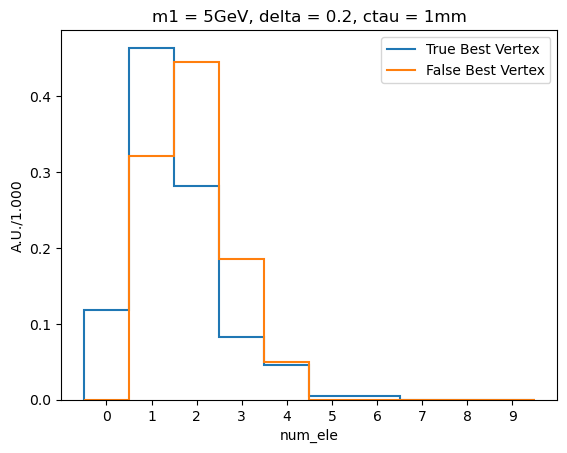

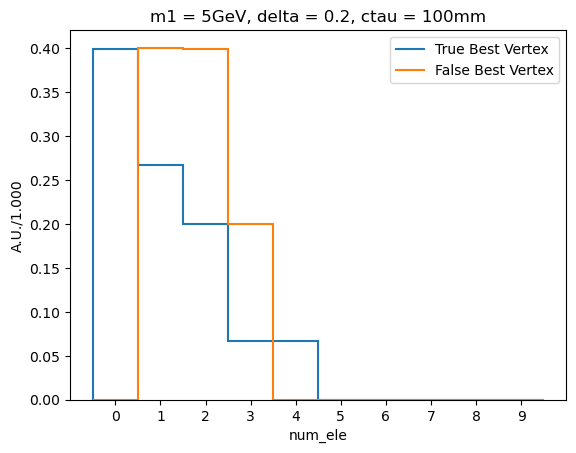

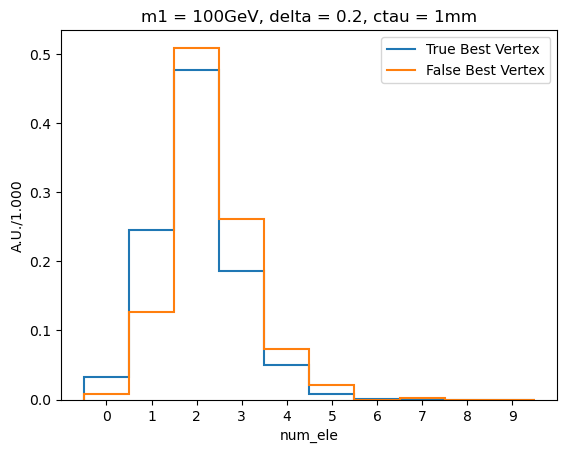

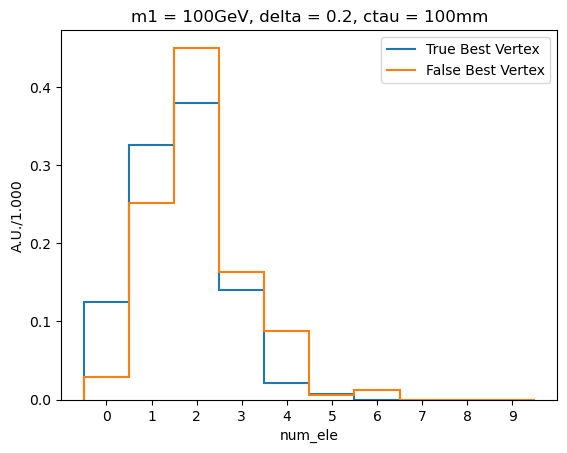

In [65]:
# Plot settings
plot_dict = {
    'variable': 'nPF_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### nElectron

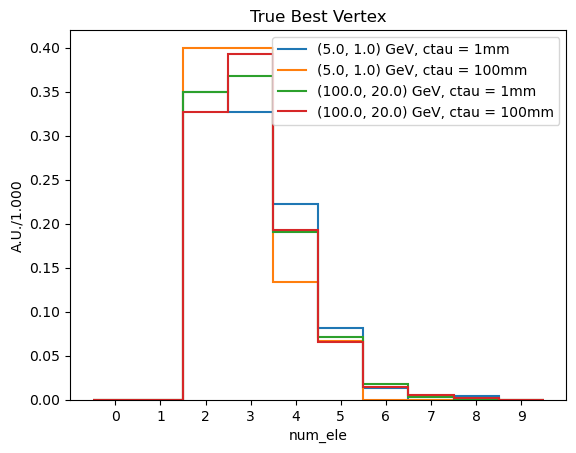

In [66]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nElectron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

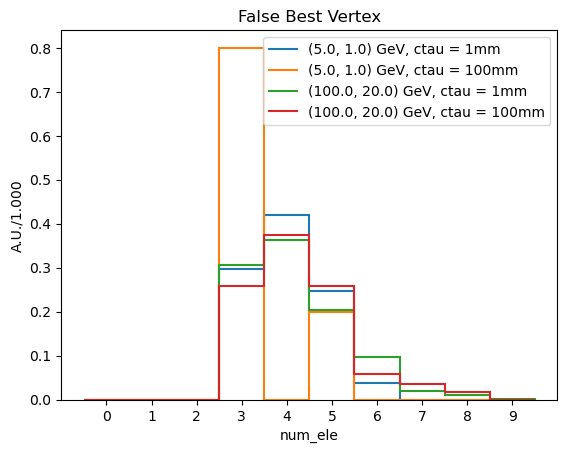

In [67]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nElectron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

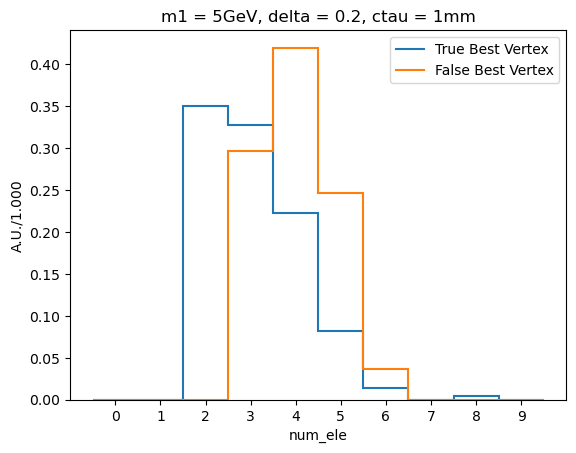

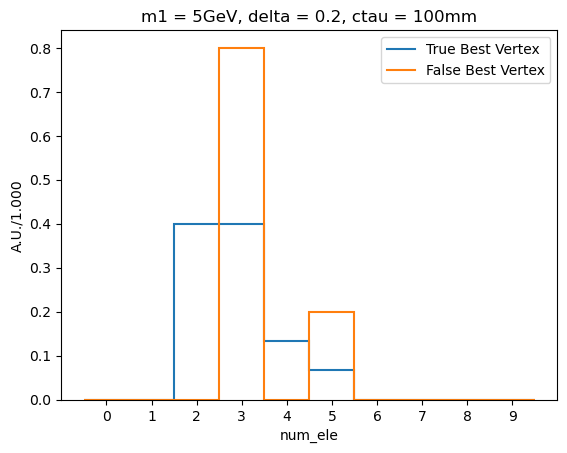

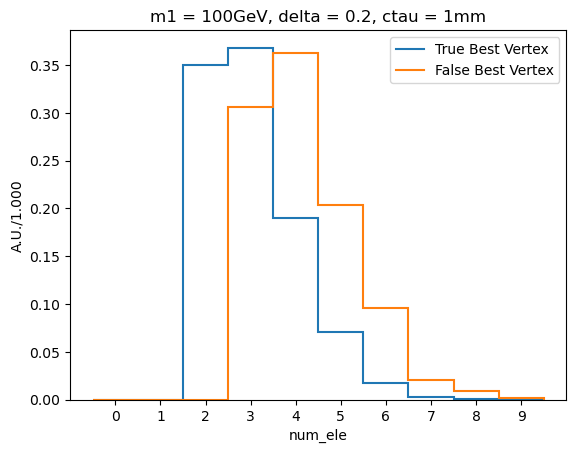

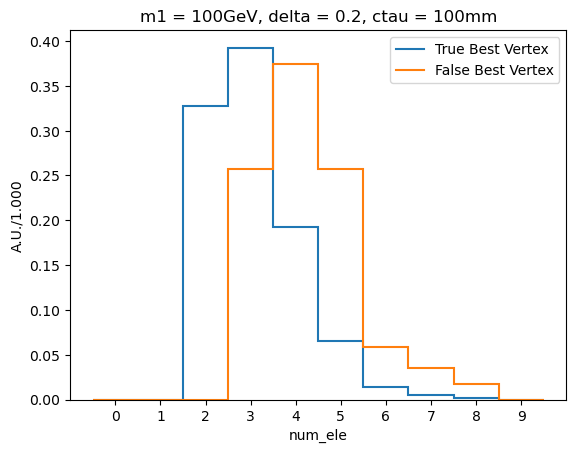

In [68]:
# Plot settings
plot_dict = {
    'variable': 'nElectron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}


# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

### nGoodVtx

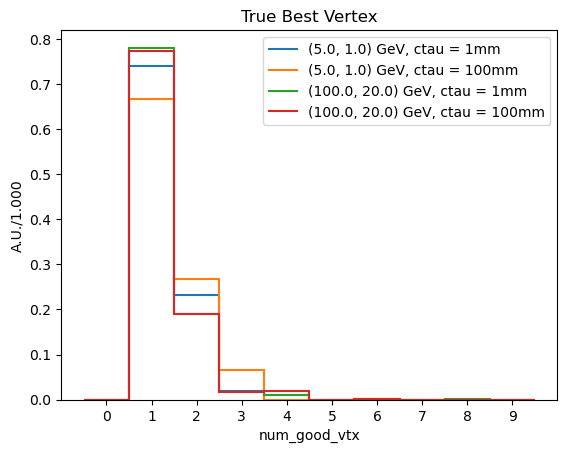

In [69]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nGoodVtx',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

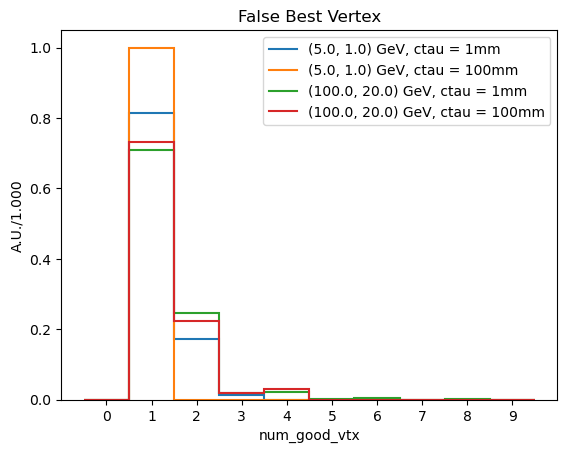

In [70]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nGoodVtx',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

plt.title('False Best Vertex')
plt.legend()
plt.show()

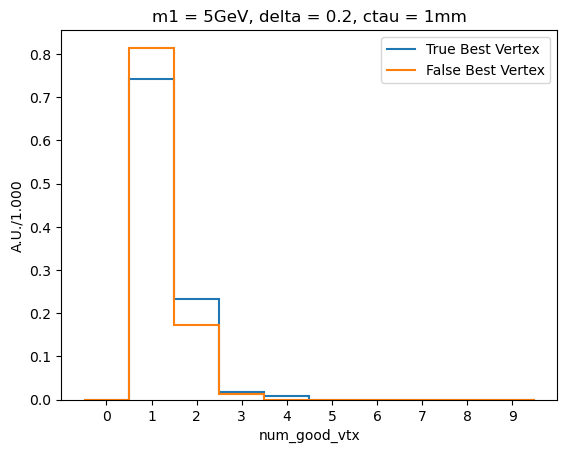

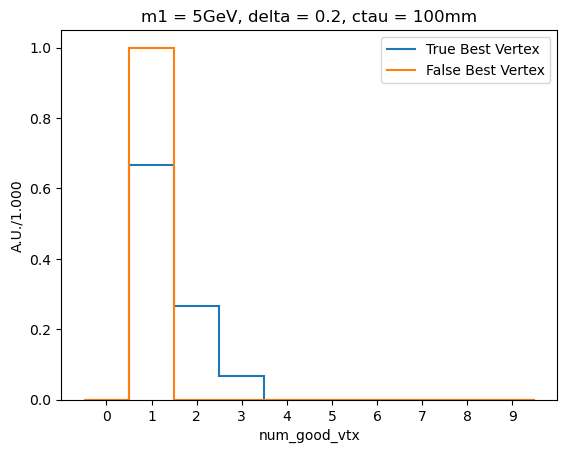

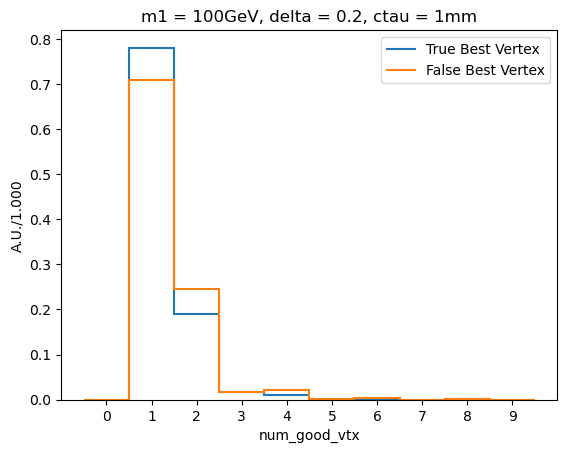

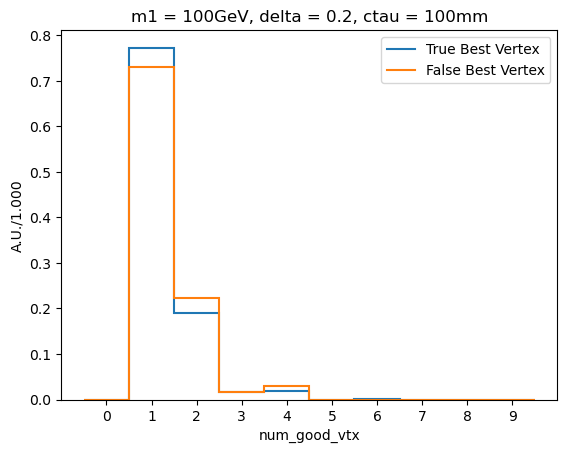

In [71]:
# Plot settings
plot_dict = {
    'variable': 'nGoodVtx',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'True Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'False Best Vertex'
            utils.plot_signal_1D(ax, sig_histo_false, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

In [72]:
sig_histo_true['sel_vtx_vxy_vs_mindxy']

Hist(
  StrCategory(['sig_2018_Mchi-99p0_dMchi-18p0_ctau-100', 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-100', 'sig_2018_Mchi-99p0_dMchi-18p0_ctau-1', 'sig_2018_Mchi-99p0_dMchi-18p0_ctau-10', 'sig_2018_Mchi-88p0_dMchi-16p0_ctau-10', 'sig_2018_Mchi-88p0_dMchi-16p0_ctau-100', 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-10', 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-1', 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-100', 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-10', 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-1', 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-100', 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-10', 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-1', 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-100', 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-10', 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-100', 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-1', 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-10', 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-1', 'sig_2018_Mchi-60p0_dMchi-20p0_ctau-100', 'sig_2018_Mchi-60p0_dMchi-20p0_ctau-10', 'sig_2018_Mchi-60p0_dMchi-20p0_ctau-1', 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-100', 'sig_20

### sel_vtx_vxy_vs_mindxy

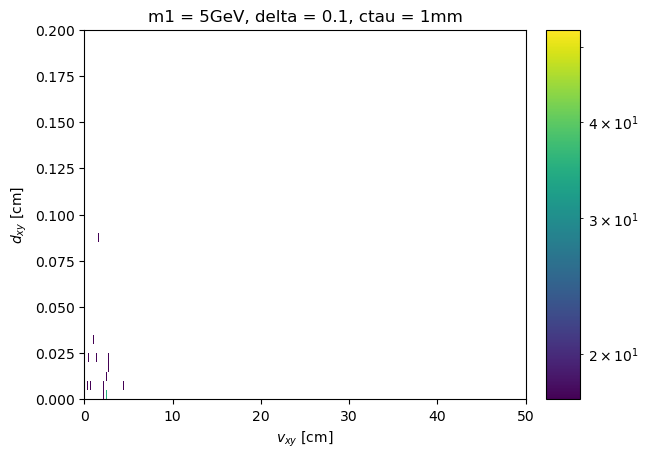

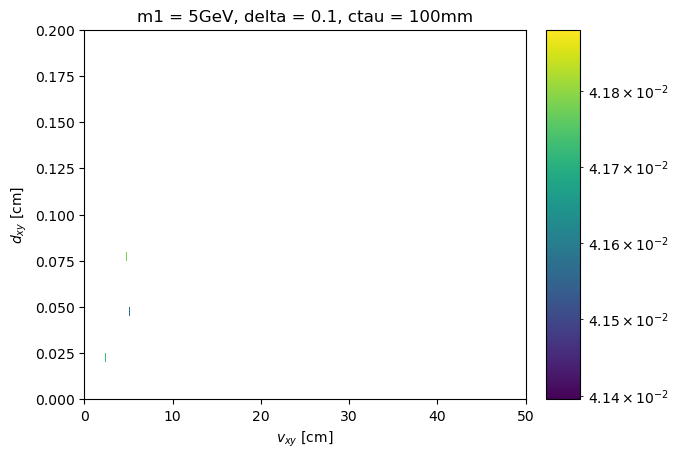

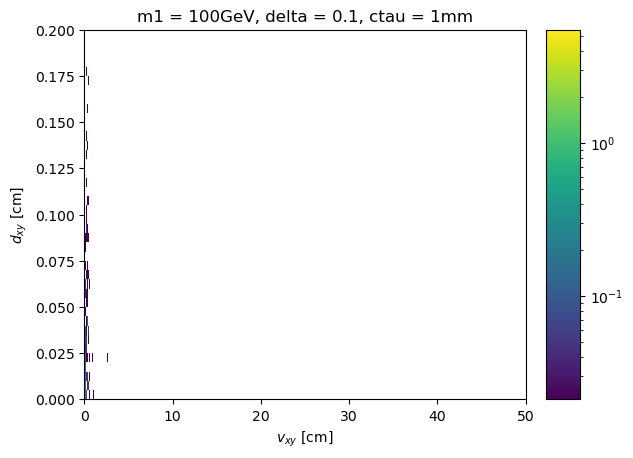

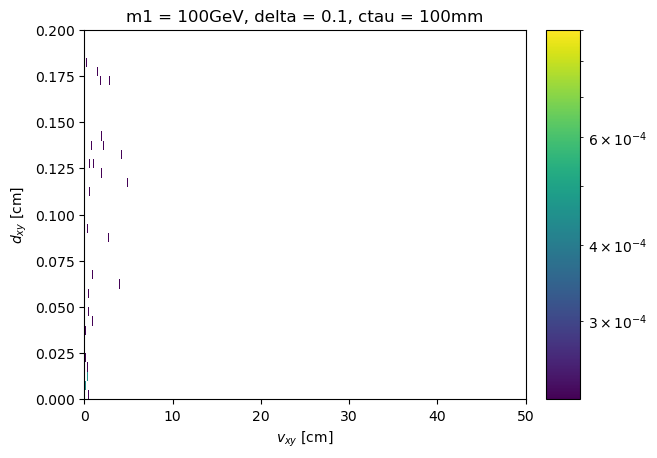

In [73]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_mindxy',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_matchType

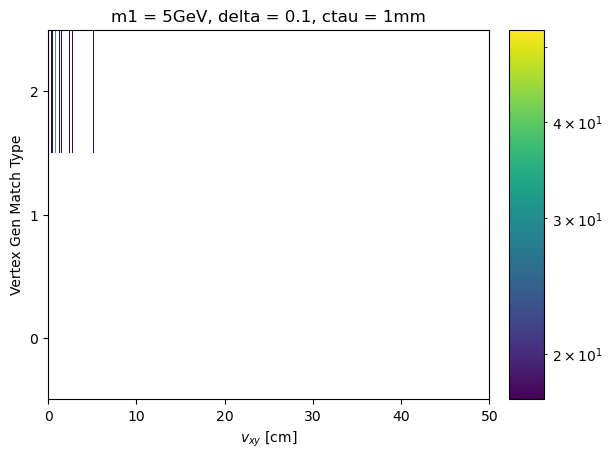

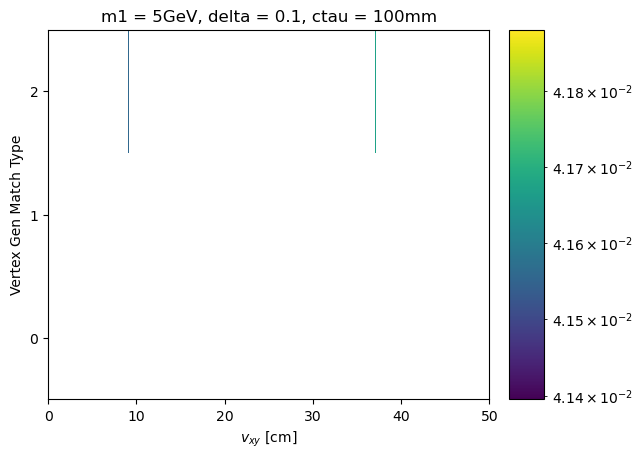

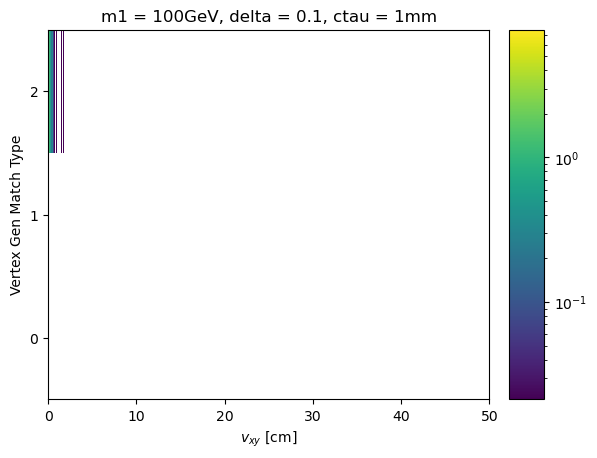

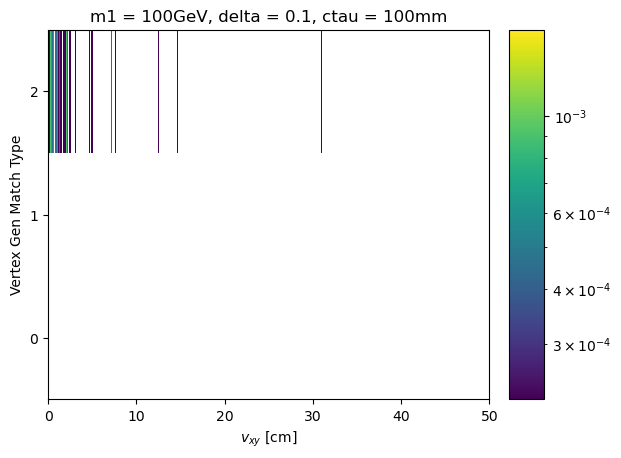

In [74]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_minDxy_vs_matchType

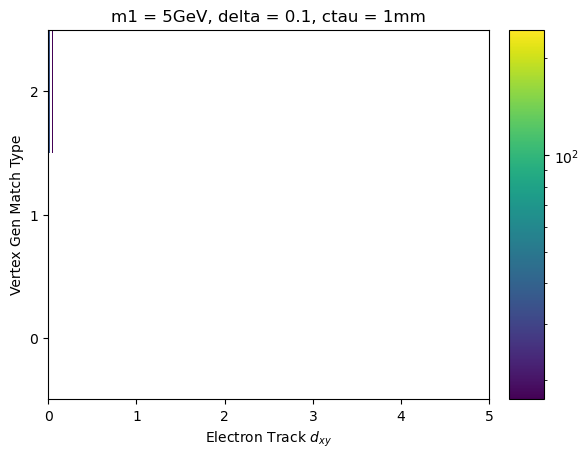

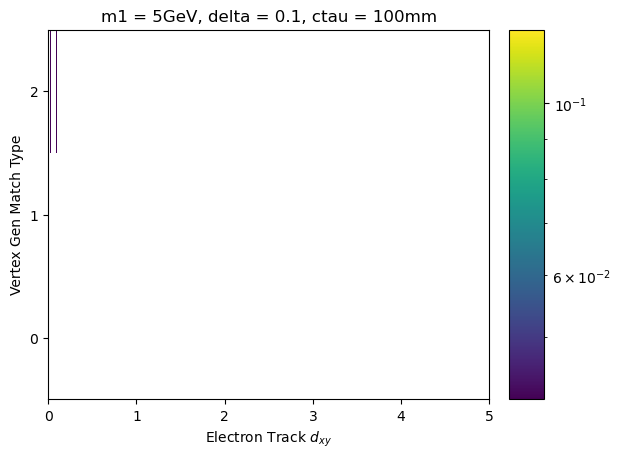

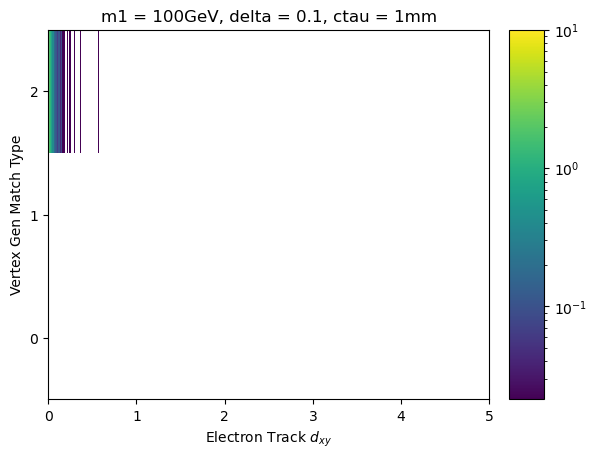

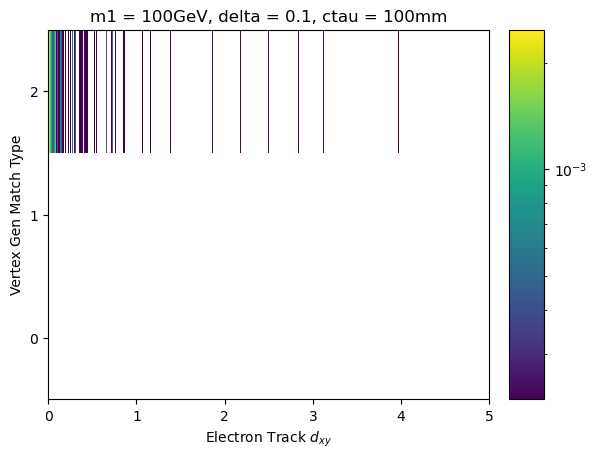

In [75]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_minDz_vs_matchType

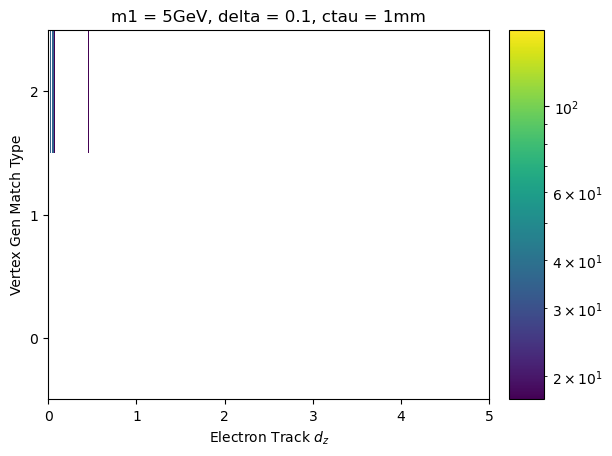

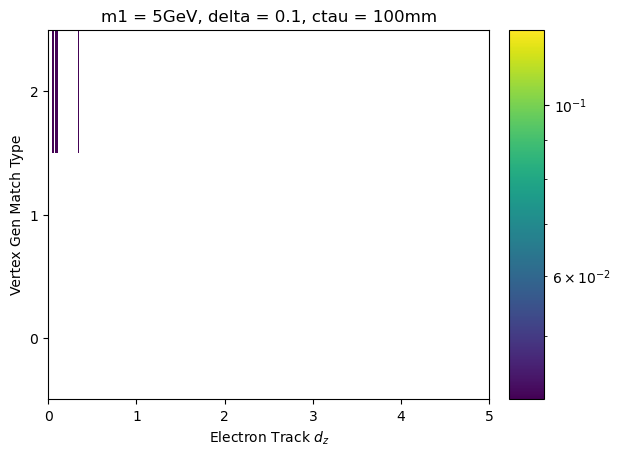

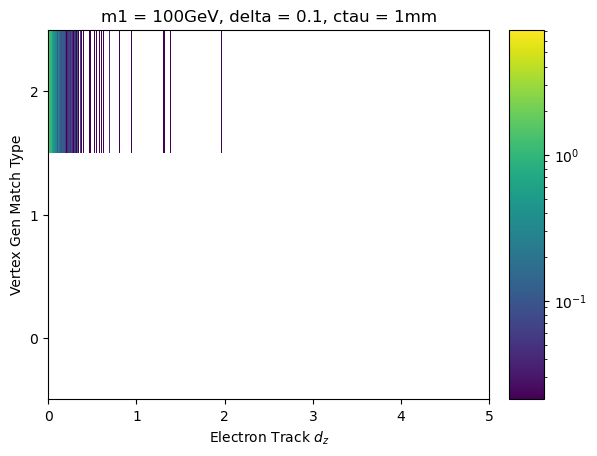

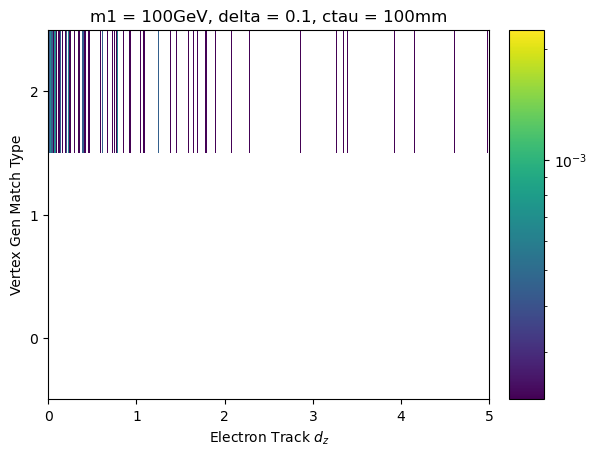

In [76]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDz_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_deltaDxy_vs_matchType

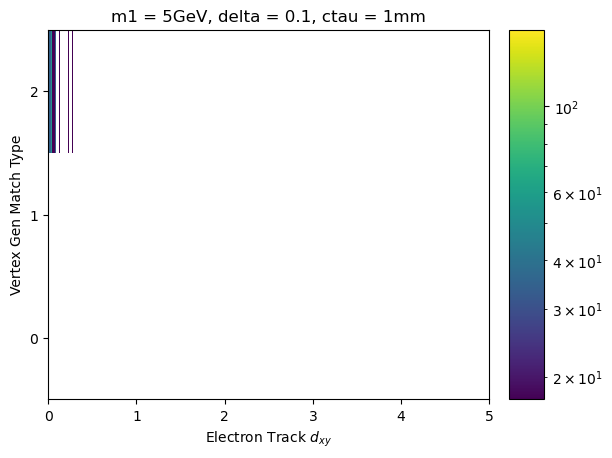

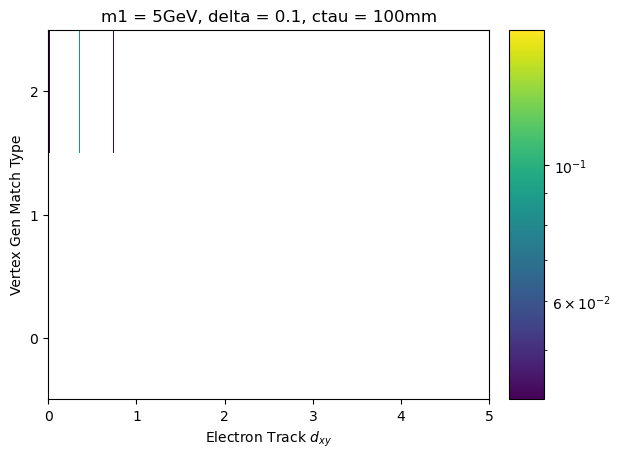

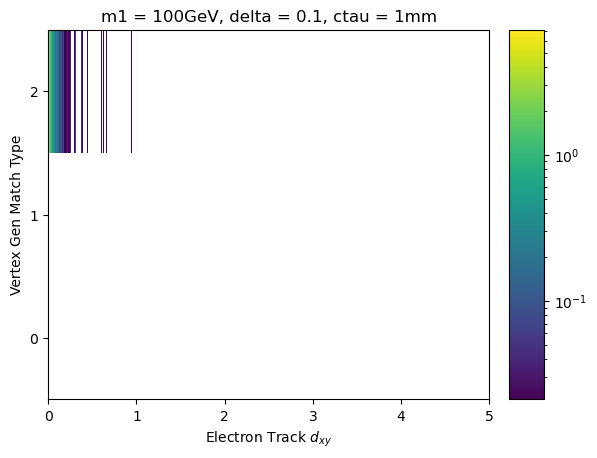

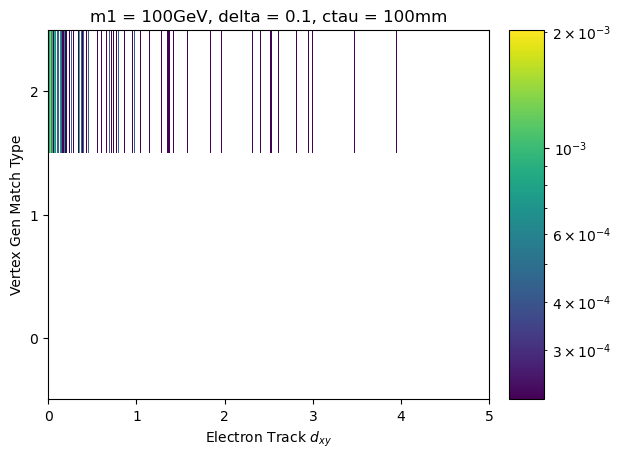

In [77]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_deltaDz_vs_matchType

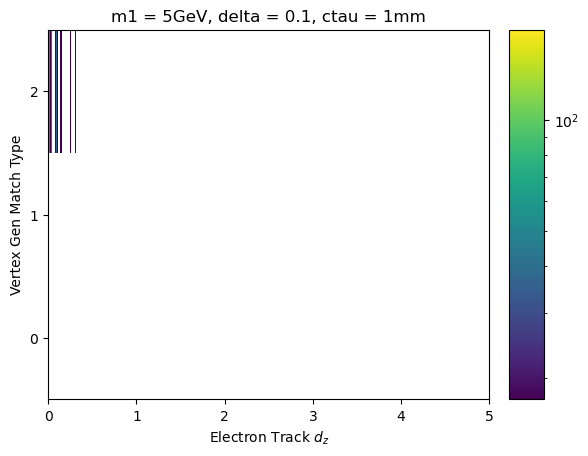

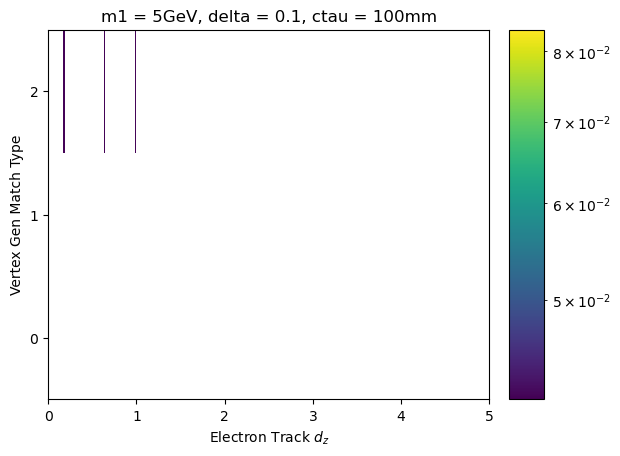

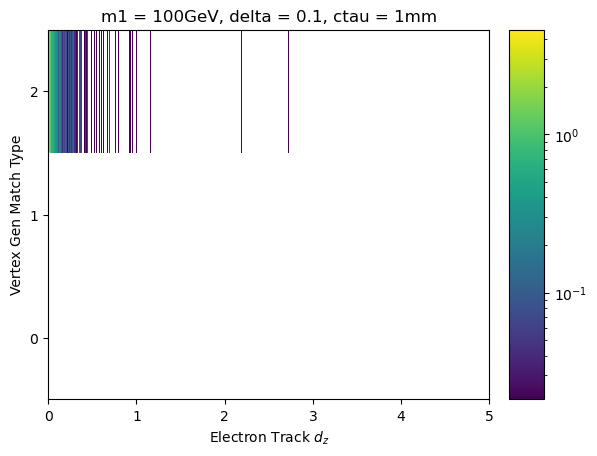

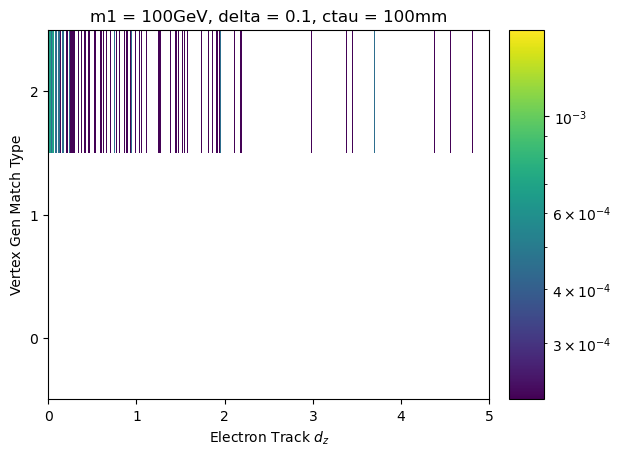

In [78]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDz_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxySignif_vs_matchType

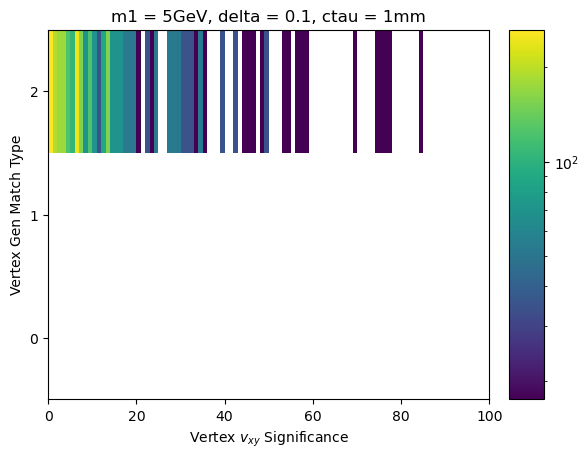

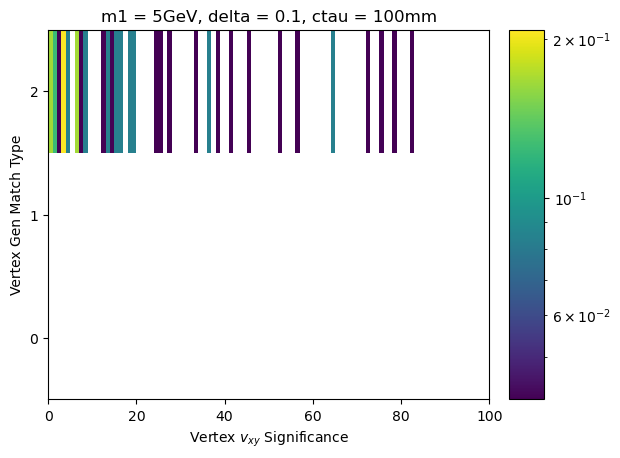

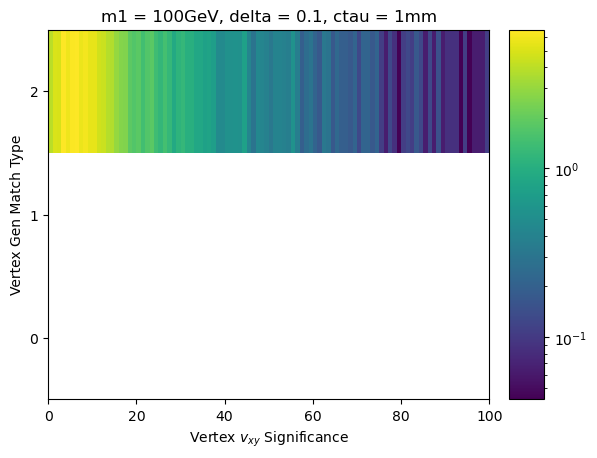

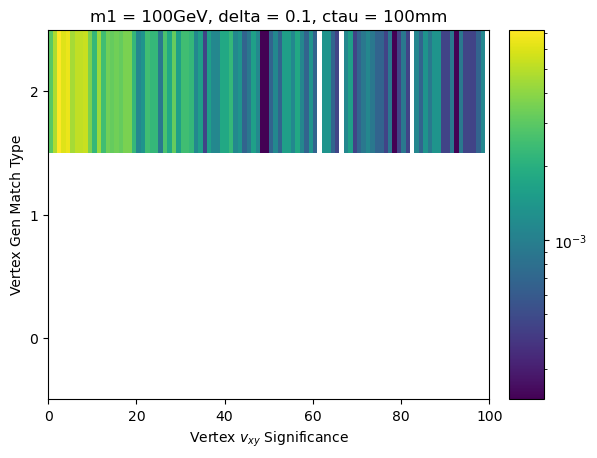

In [79]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_chi2_vs_matchType

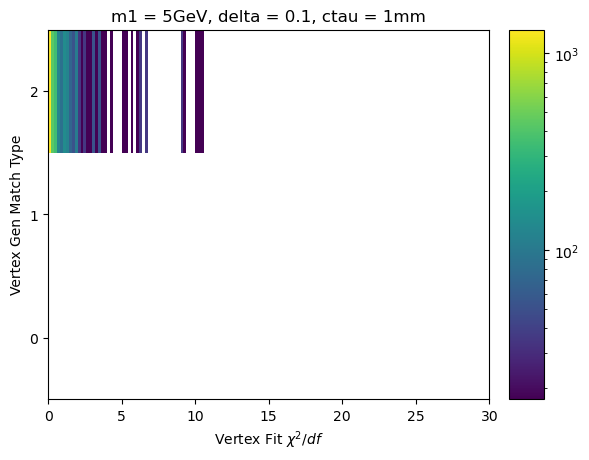

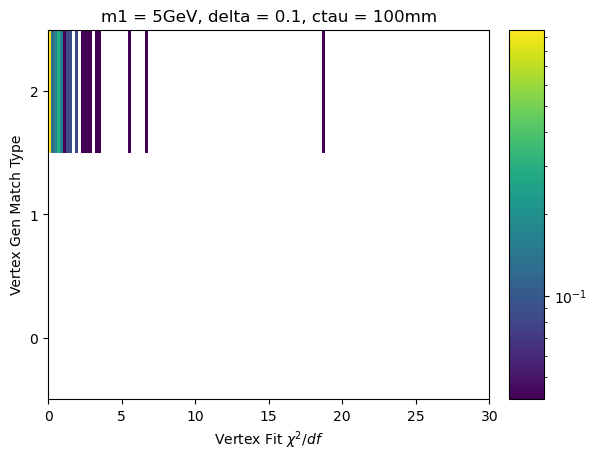

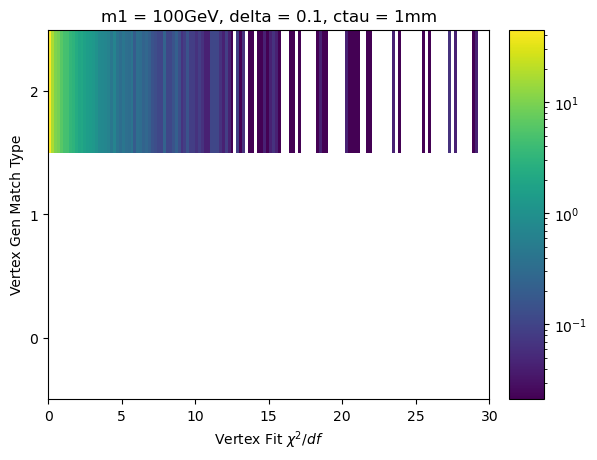

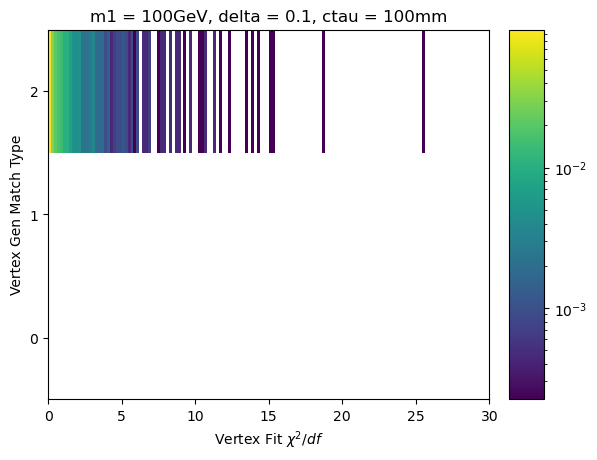

In [80]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dR_vs_matchType

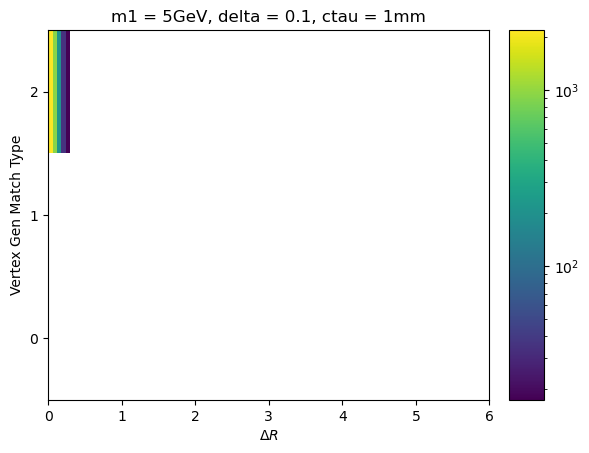

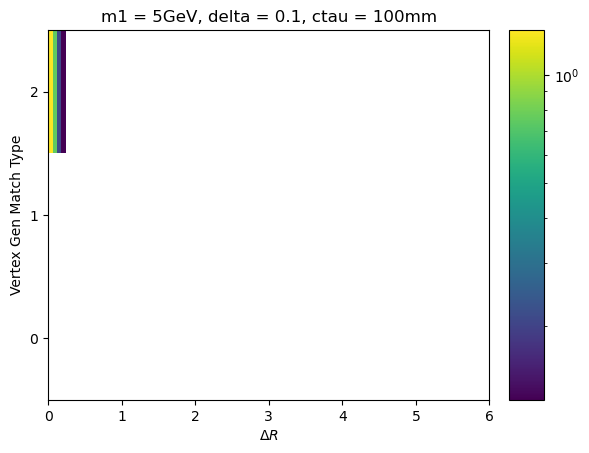

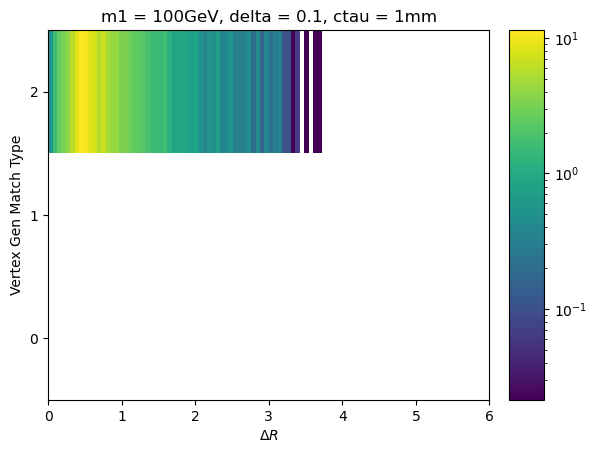

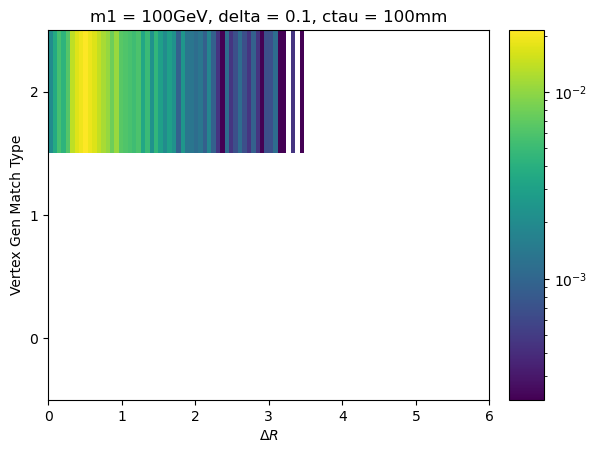

In [81]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dEta_vs_matchType

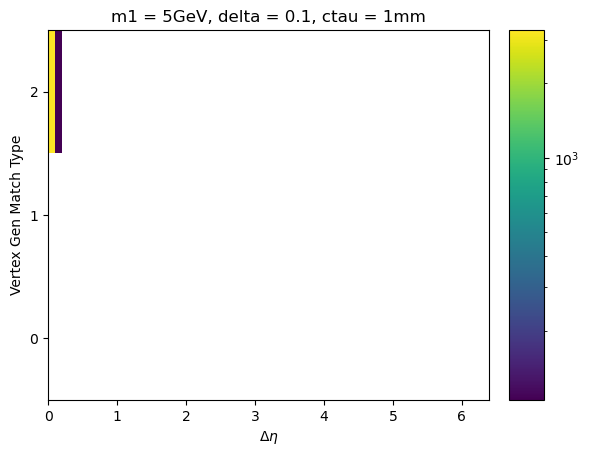

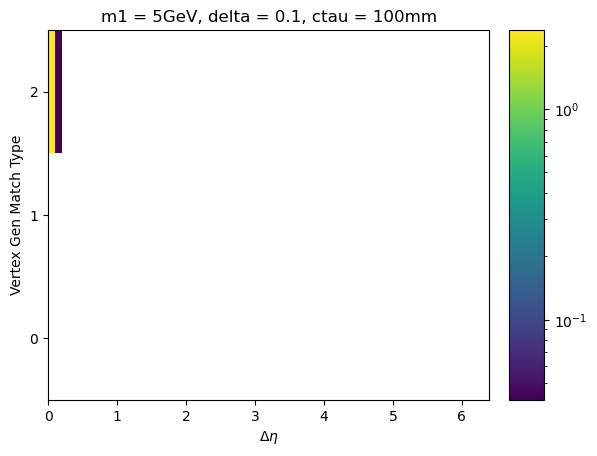

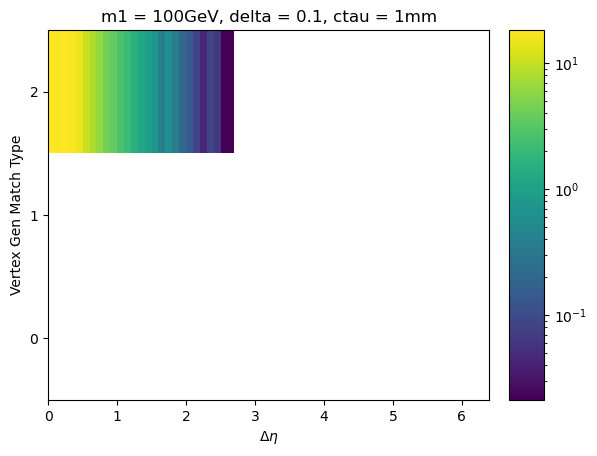

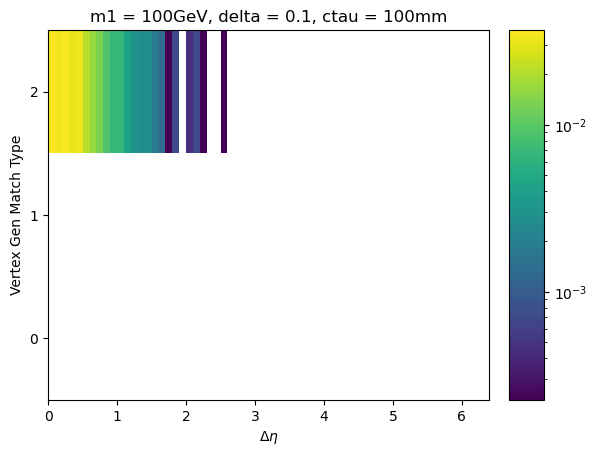

In [82]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dPhi_vs_matchType

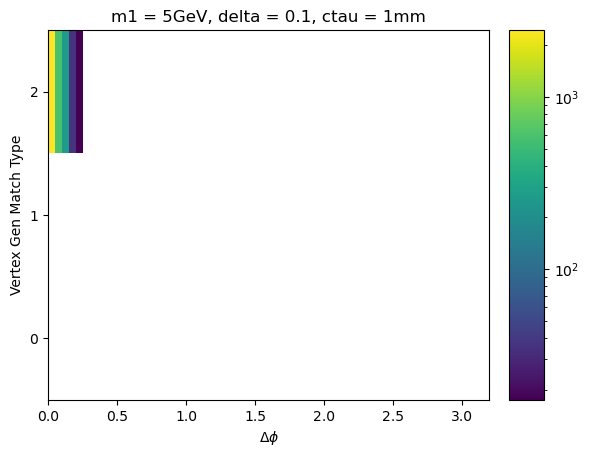

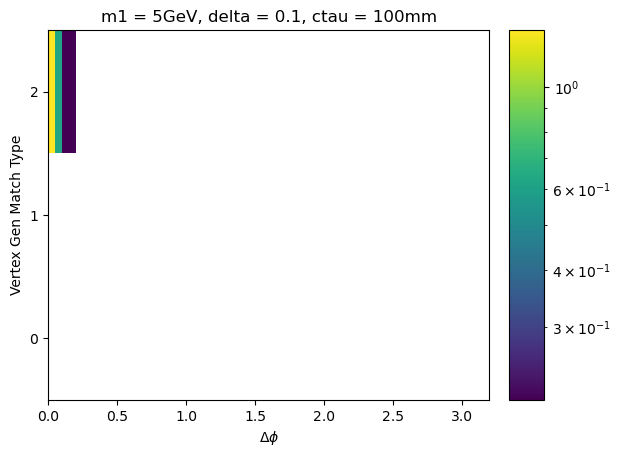

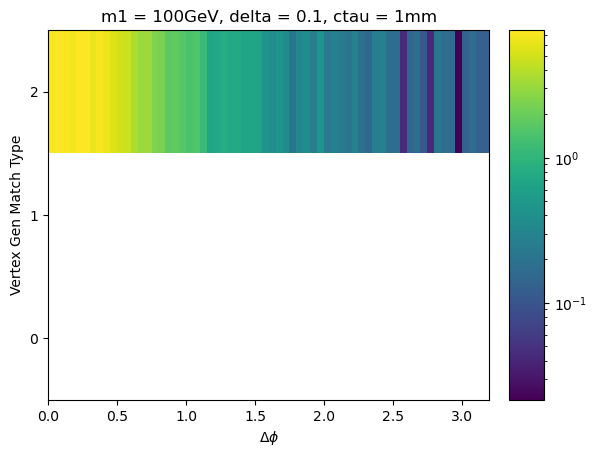

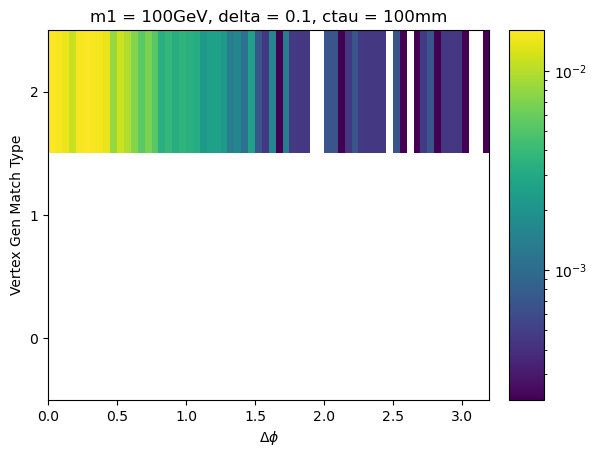

In [83]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_sign_eta_vs_matchType

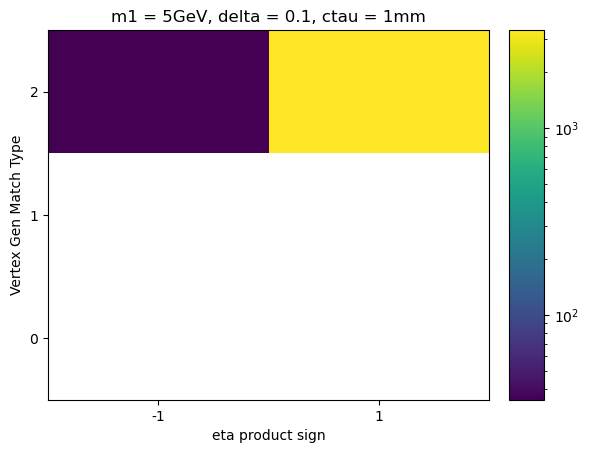

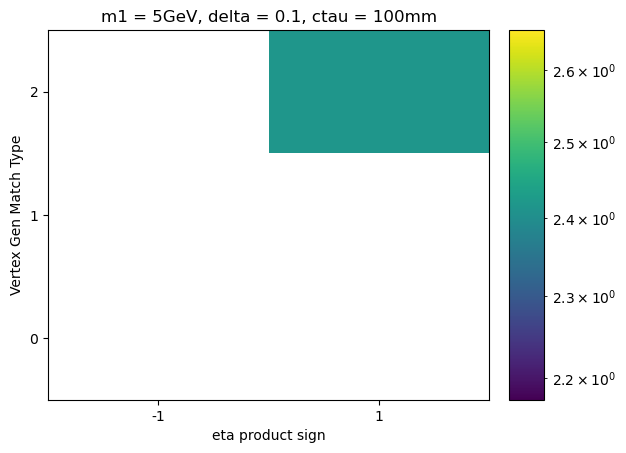

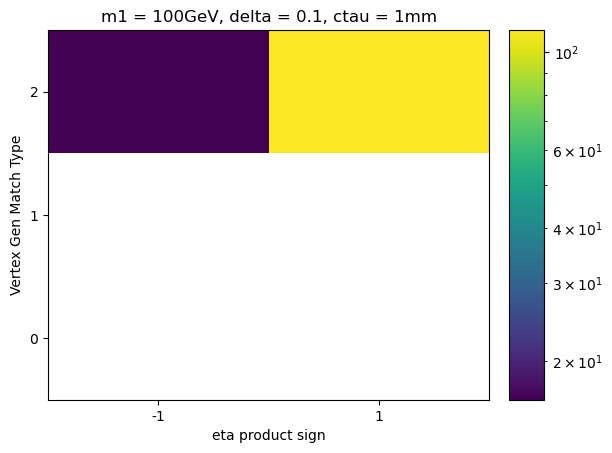

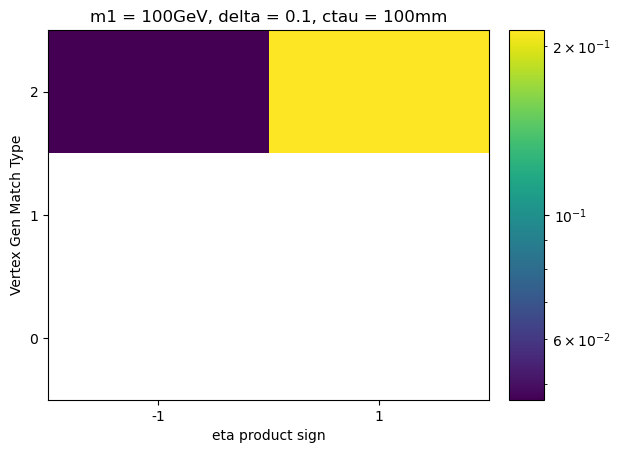

In [84]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign_eta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_pt_vs_matchType

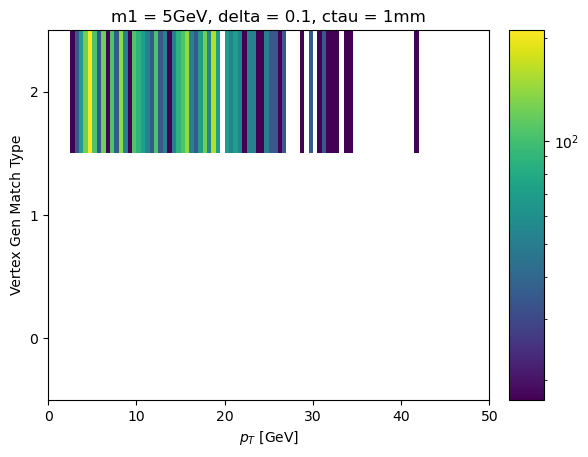

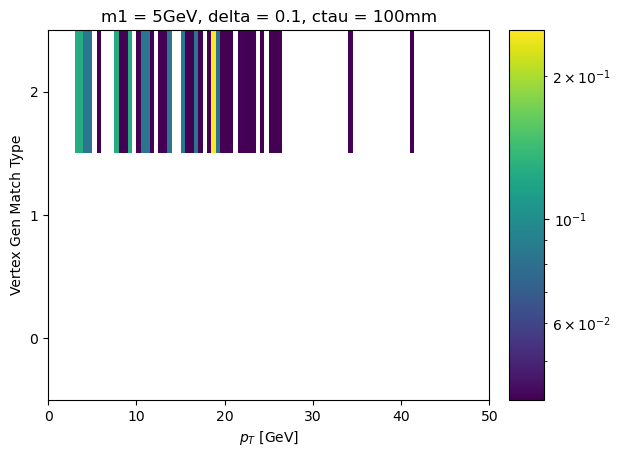

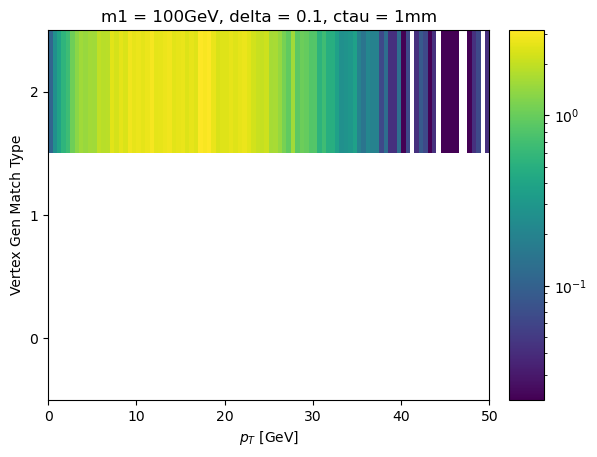

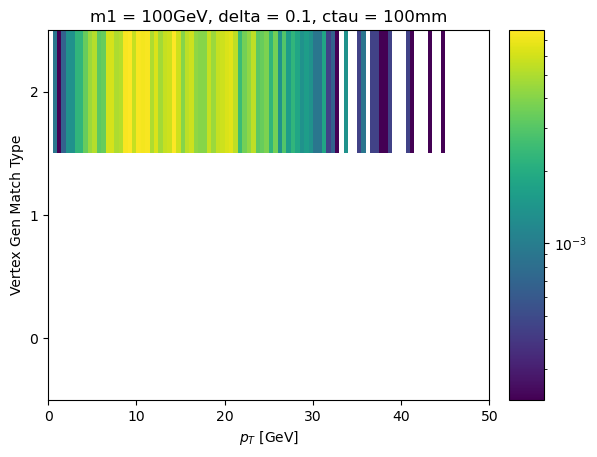

In [85]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_eta_vs_matchType

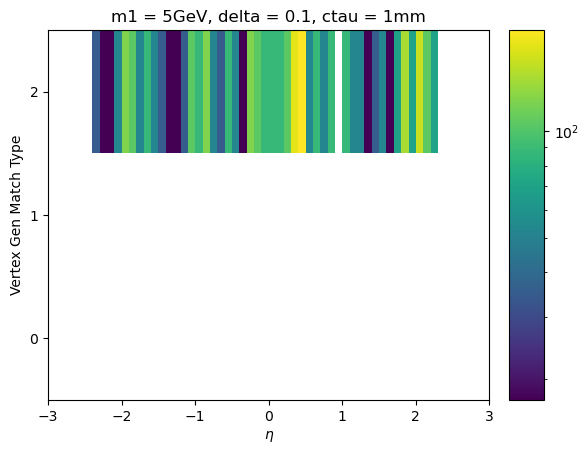

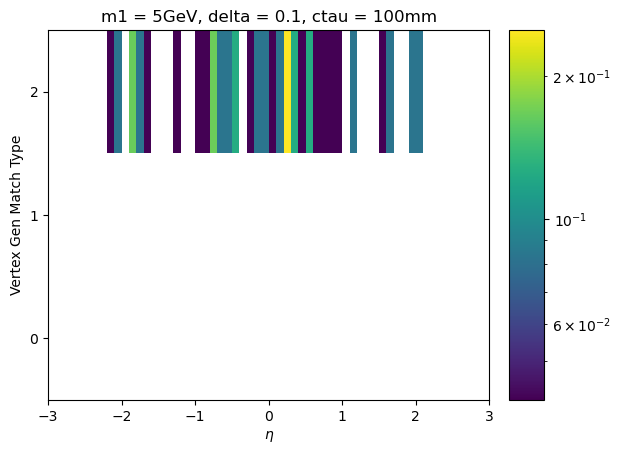

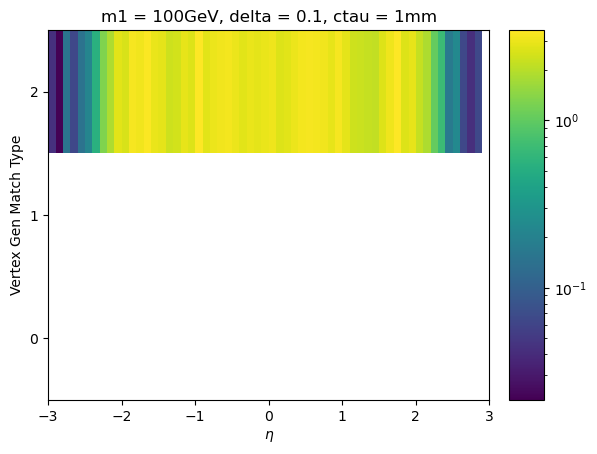

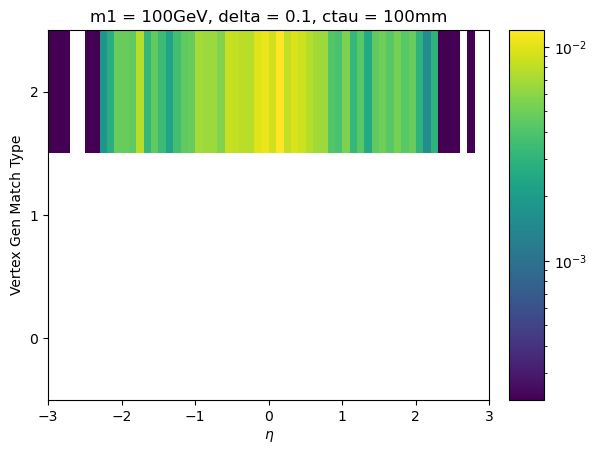

In [86]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_eta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_phi_vs_matchType

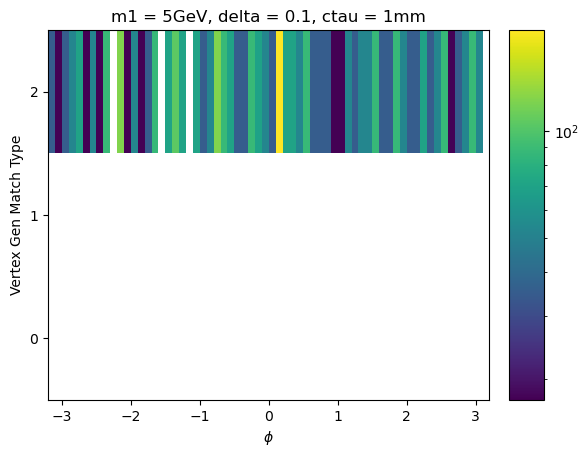

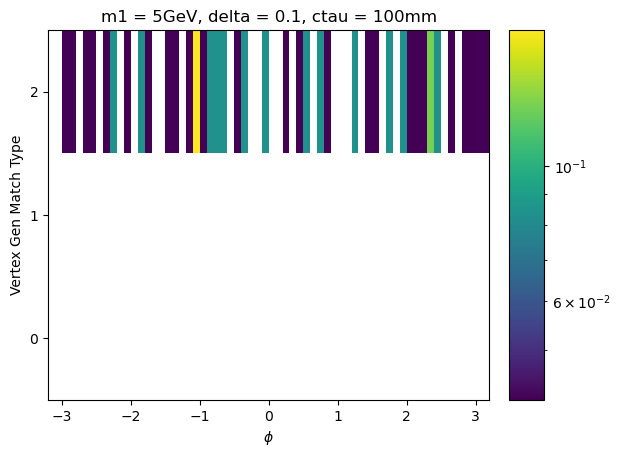

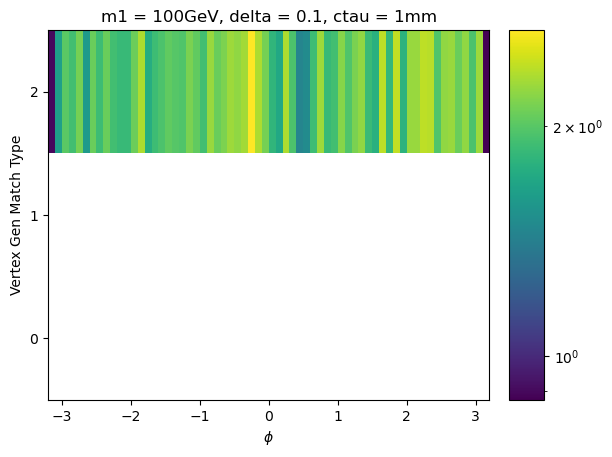

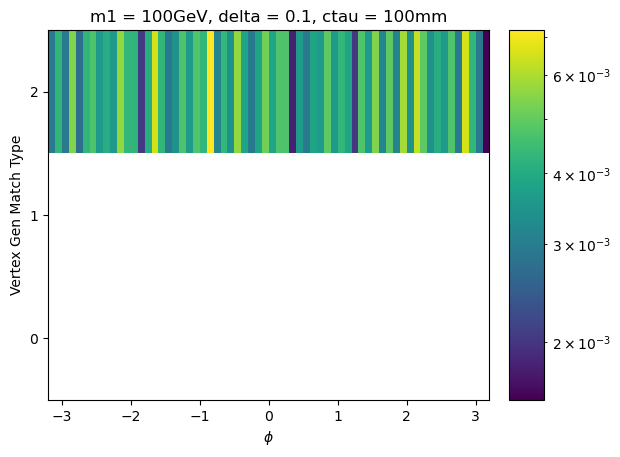

In [87]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_phi_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_mass_vs_matchType

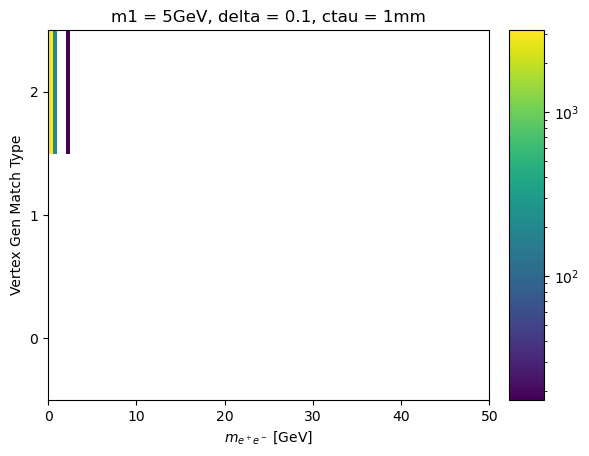

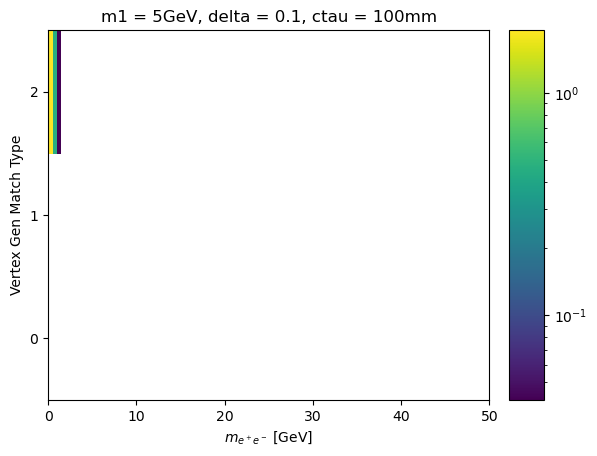

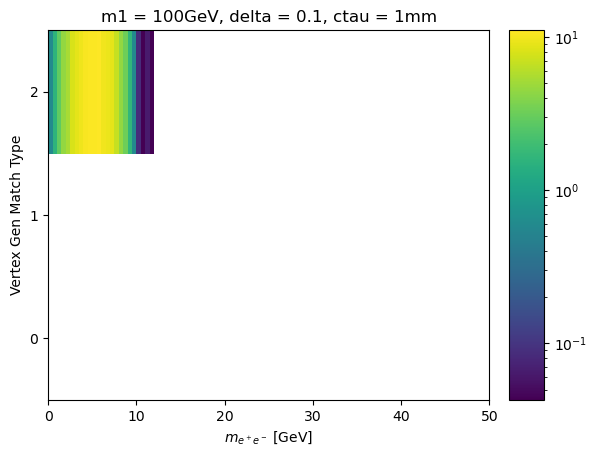

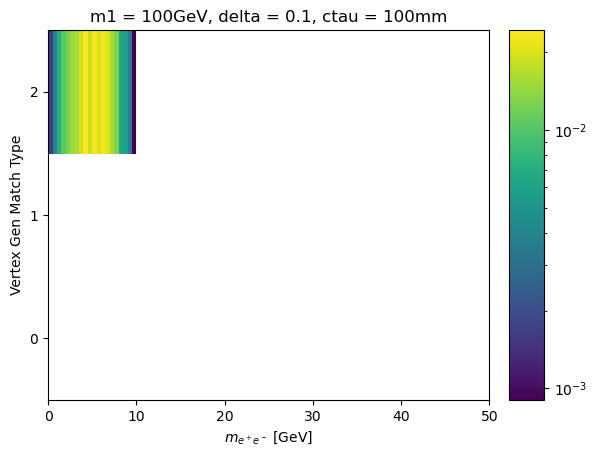

In [88]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_type_vs_matchType

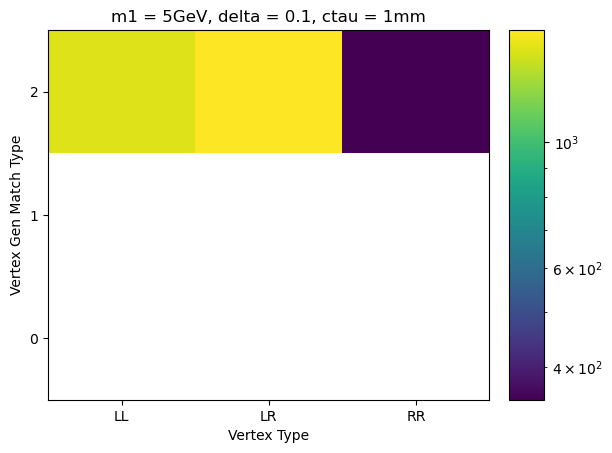

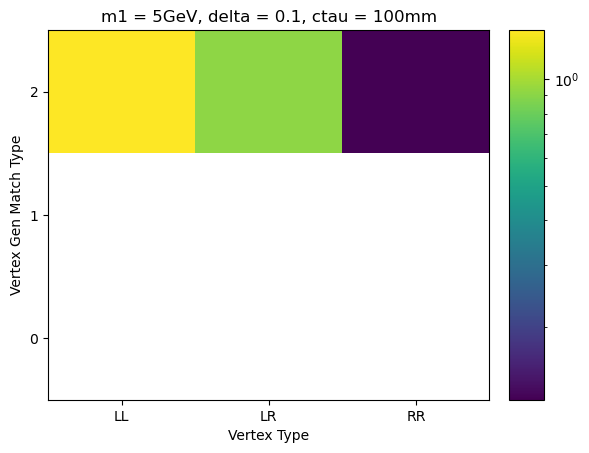

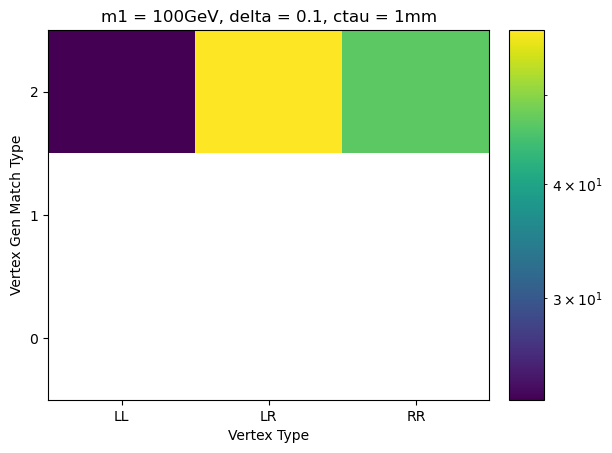

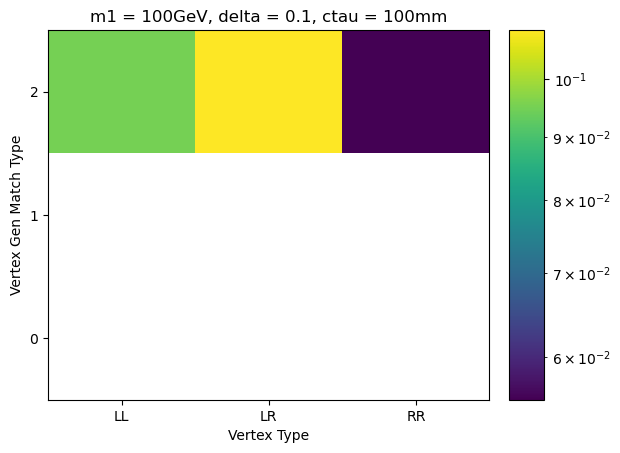

In [89]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()